<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2001-2050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2497]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2498]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

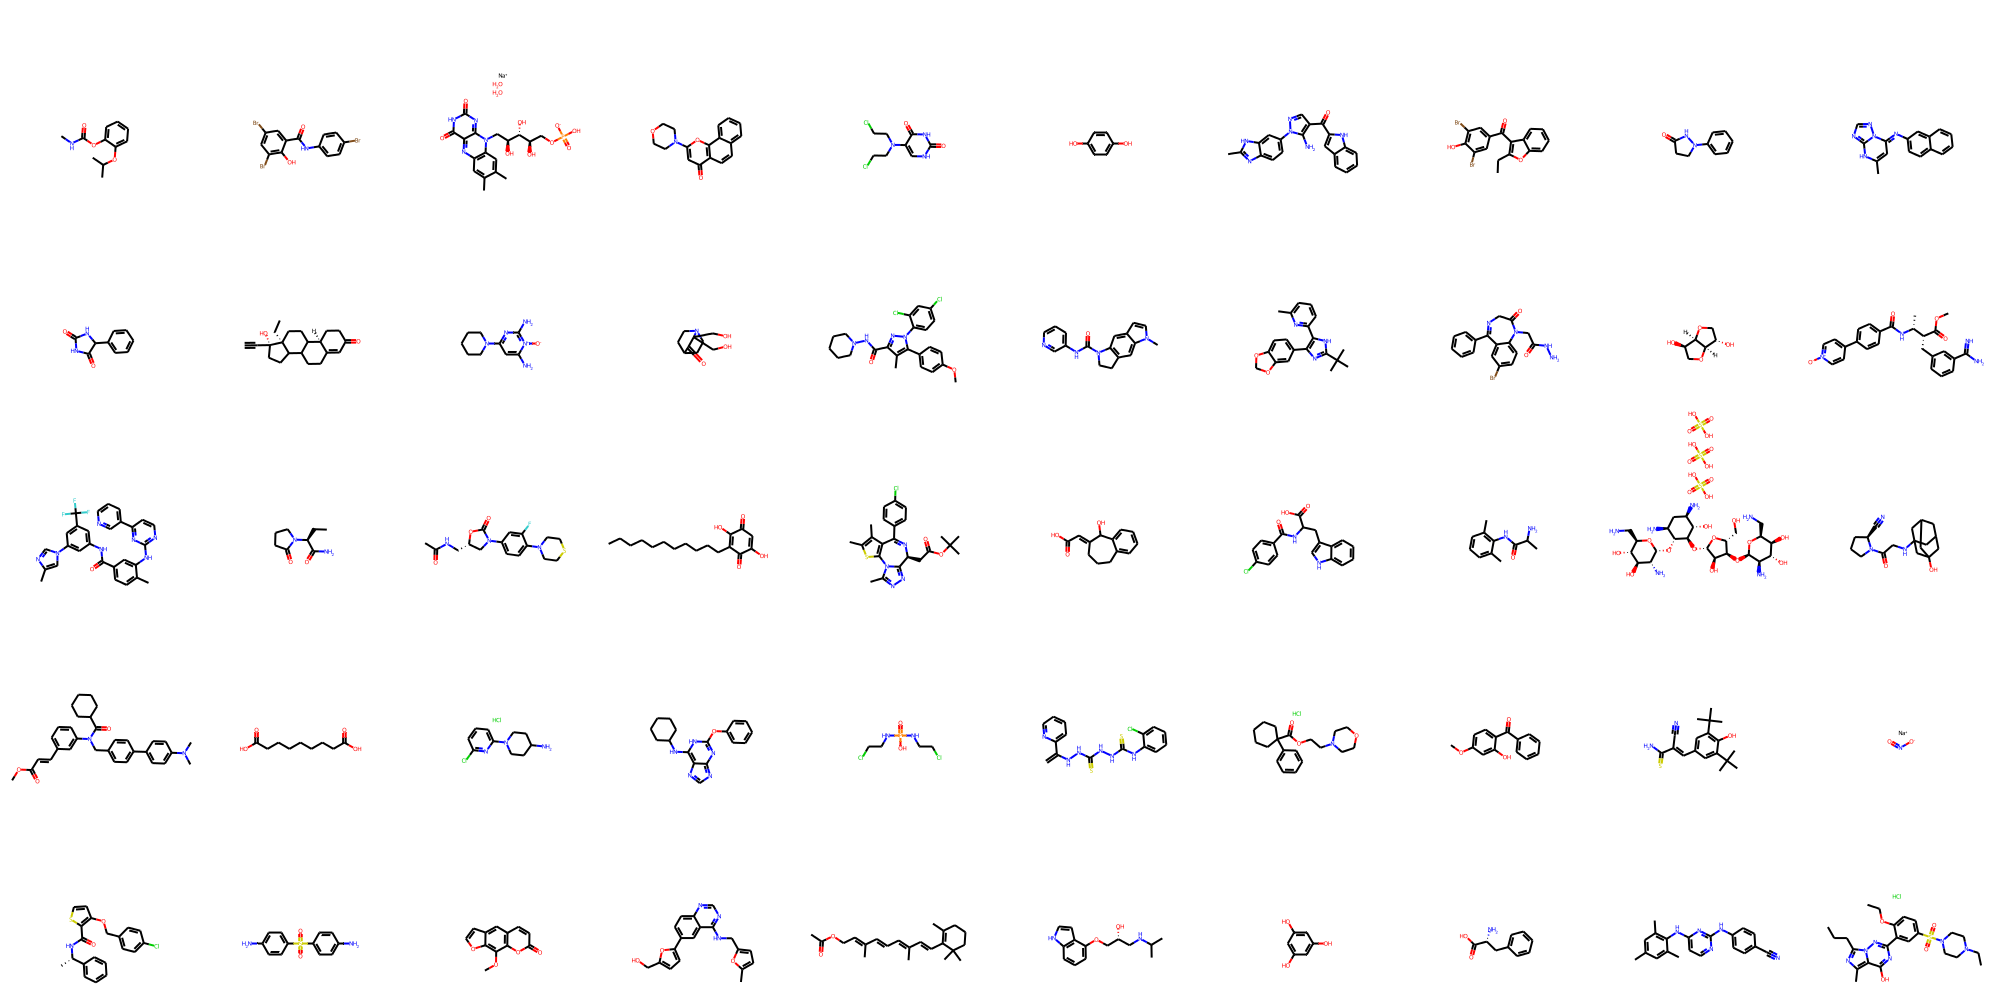

In [2499]:
smiles_list = [

'CNC(=O)Oc1ccccc1OC(C)C',
'O=C(Nc1ccc(Br)cc1)c1cc(Br)cc(Br)c1O',
'Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C[C@H](O)[C@H](O)[C@H](O)COP(=O)([O-])O)c2cc1C.O.O.[Na+]',
'O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12',
'O=c1[nH]cc(N(CCCl)CCCl)c(=O)[nH]1',
'Oc1ccc(O)cc1',
'Cc1nc2ccc(-n3ncc(C(=O)c4cc5ccccc5[nH]4)c3N)cc2[nH]1',
'CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1',
'O=C1CCN(c2ccccc2)N1',
'Cc1c/c(=N\c2ccc3ccccc3c2)n2ncnc2[nH]1',
'O=C1NC(=O)C(c2ccccc2)N1',
'C#C[C@]1(O)CCC2C3CCC4=CC(=O)CC[C@@H]4C3CC[C@@]21CC',
'Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]',
'O=C1C2CCN(CC2)C1(CO)CO',
'COc1ccc(-c2c(C)c(C(=O)NN3CCCCC3)nn2-c2ccc(Cl)cc2Cl)cc1',
'Cn1ccc2cc3c(cc21)CCN3C(=O)Nc1cccnc1',
'Cc1cccc(-c2[nH]c(C(C)(C)C)nc2-c2ccc3c(c2)OCO3)n1',
'NNC(=O)CN1C(=O)CN=C(c2ccccc2)c2cc(Br)ccc21',
'O[C@H]1CO[C@@H]2[C@H](O)CO[C@H]12',
'COC(=O)[C@H](Cc1cccc(C(=N)N)c1)[C@@H](C)NC(=O)c1ccc(-c2cc[n+]([O-])cc2)cc1',
'Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)n4)c3)cc(C(F)(F)F)c2)cn1',
'CC[C@@H](C(N)=O)N1CCCC1=O',
'CC(=O)NC[C@H]1CN(c2ccc(N3CCSCC3)c(F)c2)C(=O)O1',
'CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O',
'Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)OC(C)(C)C)c1nnc(C)n1-2',
'O=C(O)/C=C1\CCCc2ccccc2C1O',
'O=C(NC(Cc1c[nH]c2ccccc12)C(=O)O)c1ccc(Cl)cc1',
'Cc1cccc(C)c1NC(=O)C(C)N',
'NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@@H]3[C@@H](O)[C@H](N)C[C@H](N)[C@H]3O[C@H]3O[C@H](CN)[C@@H](O)[C@H](O)[C@H]3N)[C@@H]2O)[C@H](N)[C@@H](O)[C@@H]1O.O=S(=O)(O)O.O=S(=O)(O)O.O=S(=O)(O)O',
'N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2',
'COC(=O)/C=C/c1cccc(N(Cc2ccc(-c3ccc(N(C)C)cc3)cc2)C(=O)C2CCCCC2)c1',
'O=C(O)CCCCCCCC(=O)O',
'Cl.NC1CCN(c2cccc(Cl)n2)CC1',
'c1ccc(Oc2nc3ncnc-3c(NC3CCCCC3)[nH]2)cc1',
'O=P(O)(NCCCl)NCCCl',
'C=C(NNC(=S)NNC(=S)Nc1ccccc1Cl)c1ccccn1',
'Cl.O=C(OCCN1CCOCC1)C1(c2ccccc2)CCCCC1',
'COc1ccc(C(=O)c2ccccc2)c(O)c1',
'CC(C)(C)c1cc(/C=C(\C#N)C(N)=S)cc(C(C)(C)C)c1O',
'O=N[O-].[Na+]',
'C[C@H](NC(=O)c1sccc1OCc1ccc(Cl)cc1)c1ccccc1',
'Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1',
'COc1c2occc2cc2ccc(=O)oc12',
'Cc1ccc(CNc2ncnc3ccc(-c4ccc(CO)o4)cc23)o1',
'CC(=O)OC/C=C(C)/C=C/C=C(C)/C=C/C1=C(C)CCCC1(C)C',
'CC(C)NC[C@@H](O)COc1cccc2[nH]ccc12',
'Oc1cc(O)cc(O)c1',
'N[C@H](Cc1ccccc1)C(=O)O',
'Cc1cc(C)c(Nc2ccnc(Nc3ccc(C#N)cc3)n2)c(C)c1',
'CCCc1nc(C)c2c(O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)nn12.Cl',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



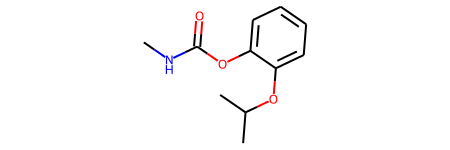

In [2500]:
M1 = mol_list [0]
M1

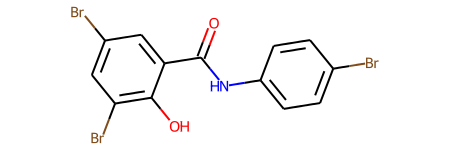

In [2501]:
M2 = mol_list [1]
M2

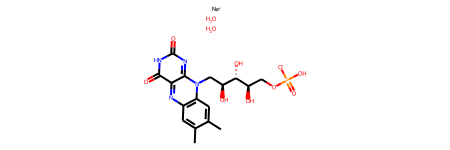

In [2502]:
M3 = mol_list [2]
M3

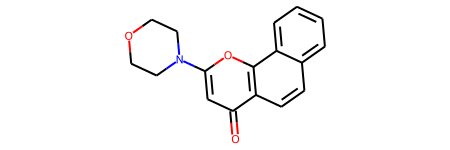

In [2503]:
M4 = mol_list [3]
M4

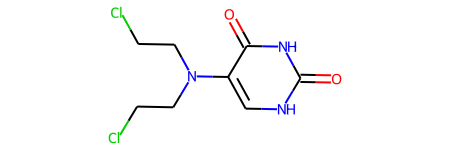

In [2504]:
M5 = mol_list [4]
M5

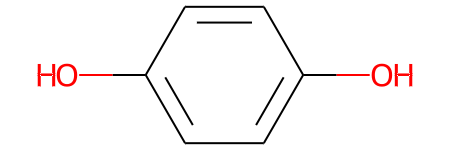

In [2505]:
M6 = mol_list [5]
M6

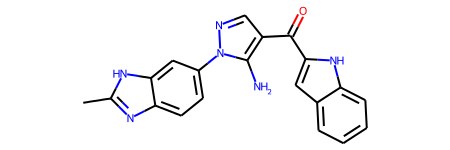

In [2506]:
M7 = mol_list [6]
M7

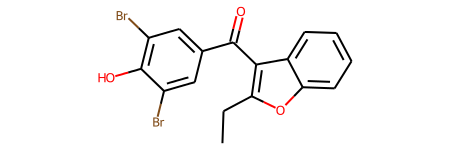

In [2507]:
M8 = mol_list [7]
M8

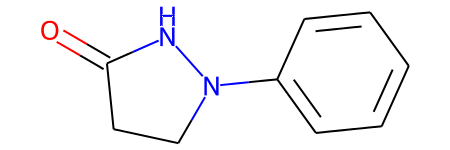

In [2508]:
M9 = mol_list [8]
M9

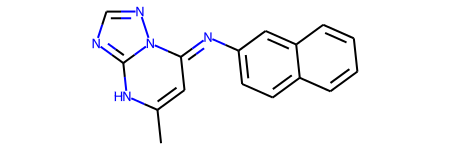

In [2509]:
M10 = mol_list [9]
M10

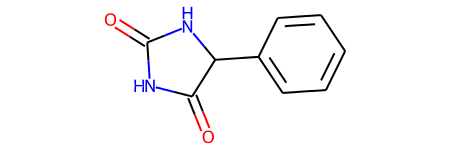

In [2510]:
M11 = mol_list [10]
M11

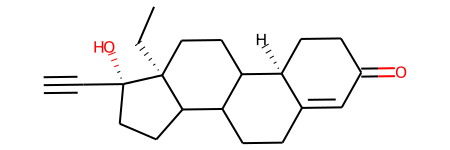

In [2511]:
M12 = mol_list [11]
M12

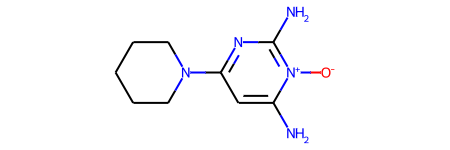

In [2512]:
M13 = mol_list [12]
M13

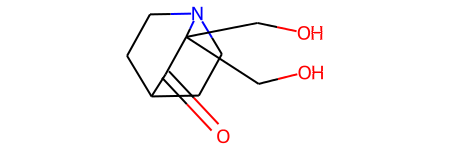

In [2513]:
M14 = mol_list [13]
M14

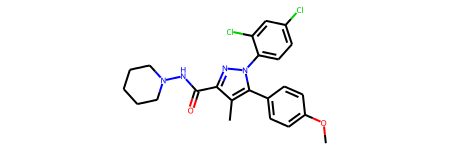

In [2514]:
M15 = mol_list [14]
M15

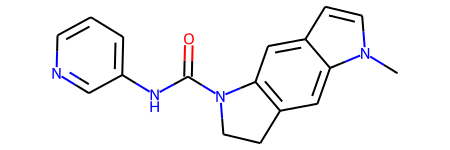

In [2515]:
M16 = mol_list [15]
M16

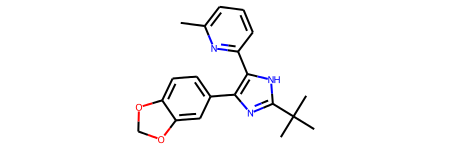

In [2516]:
M17 = mol_list [16]
M17

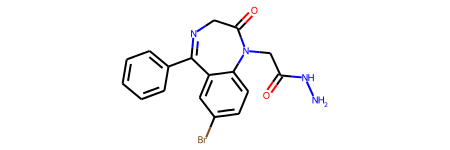

In [2517]:
M18 = mol_list [17]
M18

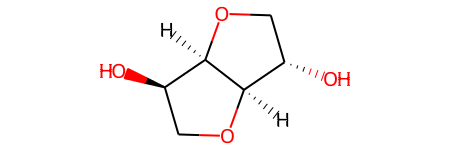

In [2518]:
M19 = mol_list [18]
M19

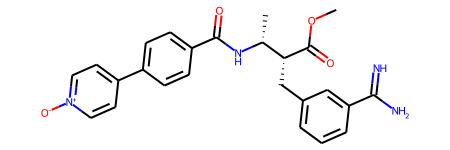

In [2519]:
M20 = mol_list [19]
M20

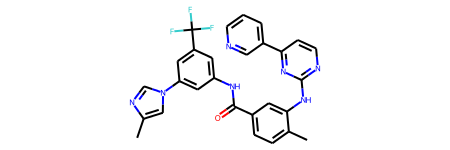

In [2520]:
M21 = mol_list [20]
M21

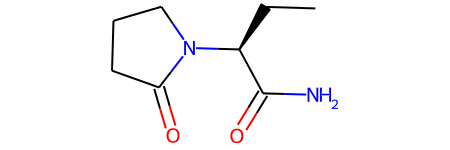

In [2521]:
M22 = mol_list [21]
M22

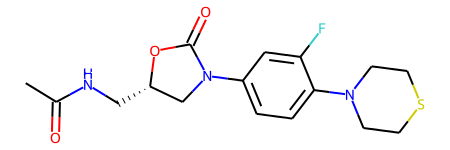

In [2522]:
M23 = mol_list [22]
M23

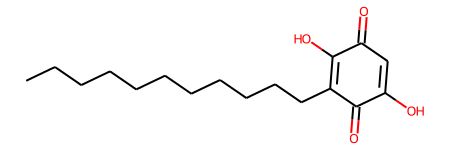

In [2523]:
M24 = mol_list [23]
M24

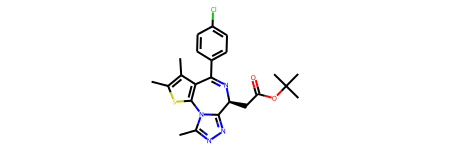

In [2524]:
M25 = mol_list [24]
M25

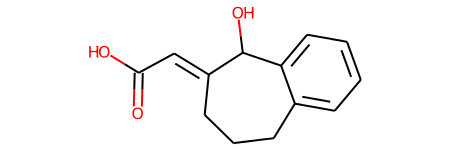

In [2525]:
M26 = mol_list [25]
M26

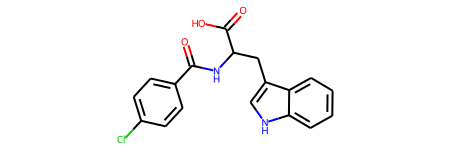

In [2526]:
M27 = mol_list [26]
M27

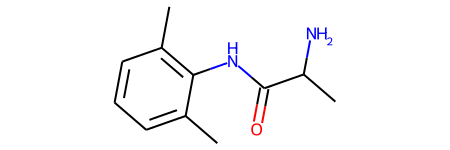

In [2527]:
M28 = mol_list [27]
M28

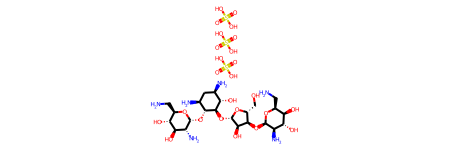

In [2528]:
M29 = mol_list [28]
M29

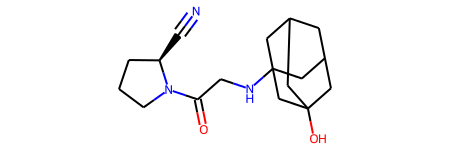

In [2529]:
M30 = mol_list [29]
M30

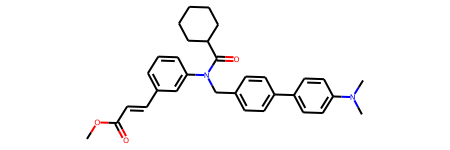

In [2530]:
M31 = mol_list [30]
M31

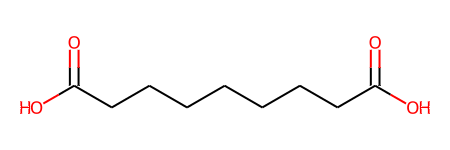

In [2531]:
M32 = mol_list [31]
M32

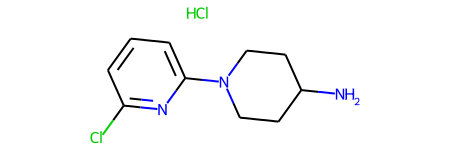

In [2532]:
M33 = mol_list [32]
M33

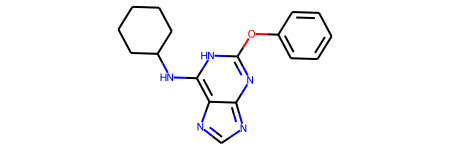

In [2533]:
M34 = mol_list [33]
M34

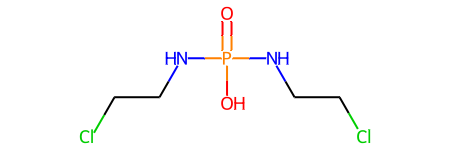

In [2534]:
M35 = mol_list [34]
M35

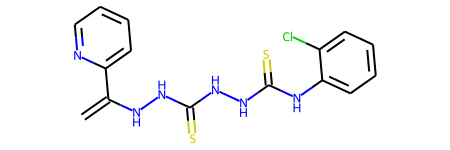

In [2535]:
M36 = mol_list [35]
M36

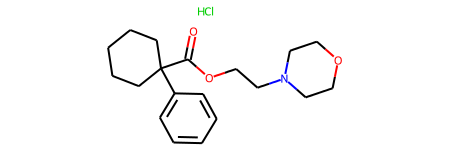

In [2536]:
M37= mol_list [36]
M37

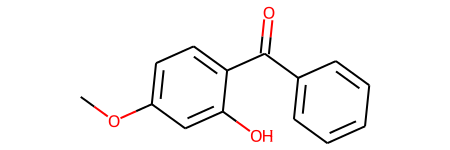

In [2537]:
M38= mol_list [37]
M38

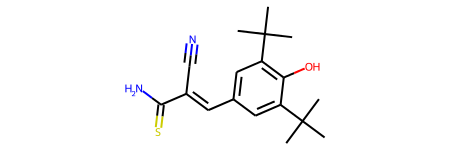

In [2538]:
M39= mol_list [38]
M39

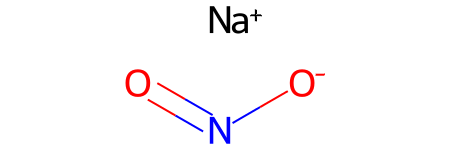

In [2539]:
M40= mol_list [39]
M40

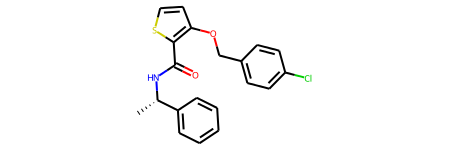

In [2540]:
M41= mol_list [40]
M41

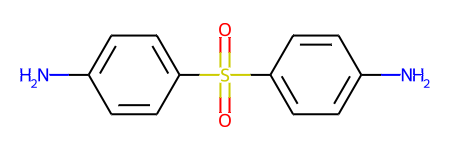

In [2541]:
M42= mol_list [41]
M42

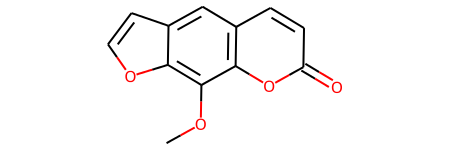

In [2542]:
M43= mol_list [42]
M43

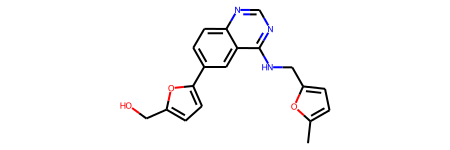

In [2543]:
M44= mol_list [43]
M44

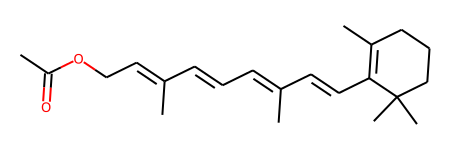

In [2544]:
M45= mol_list [44]
M45

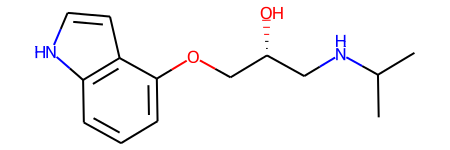

In [2545]:
M46= mol_list [45]
M46

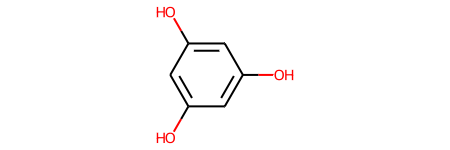

In [2546]:
M47= mol_list [46]
M47

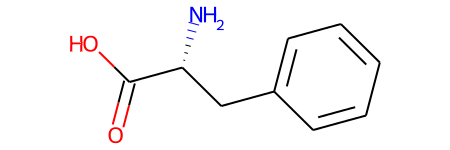

In [2547]:
M48= mol_list [47]
M48

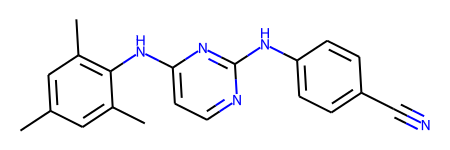

In [2548]:
M49= mol_list [48]
M49

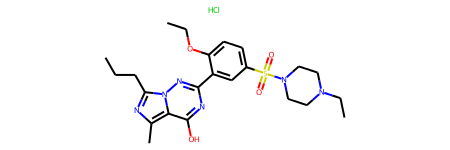

In [2549]:
M50= mol_list [49]
M50

In [2550]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 33,
 64,
 128,
 175,
 283,
 345,
 356,
 386,
 406,
 504,
 555,
 650,
 664,
 695,
 705,
 726,
 734,
 757,
 807,
 849,
 865,
 872,
 893,
 934,
 946,
 949,
 954]

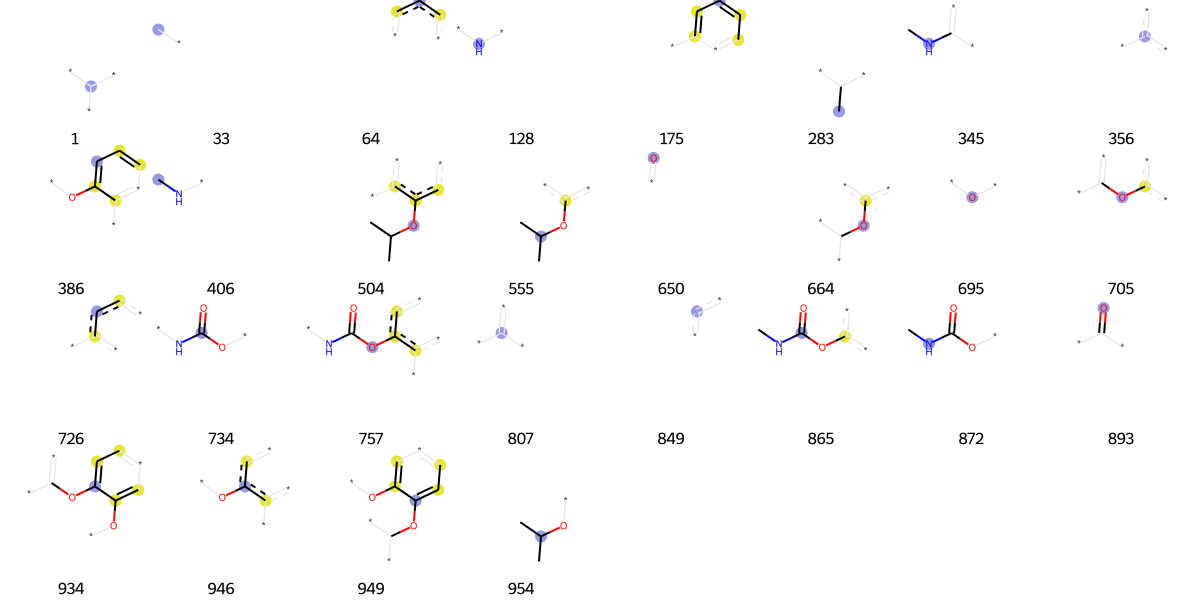

In [2551]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2552]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[53,
 128,
 133,
 191,
 202,
 254,
 322,
 356,
 486,
 506,
 578,
 607,
 625,
 650,
 726,
 728,
 784,
 792,
 807,
 833,
 843,
 847,
 849,
 857,
 875,
 893,
 908,
 909,
 954,
 967]

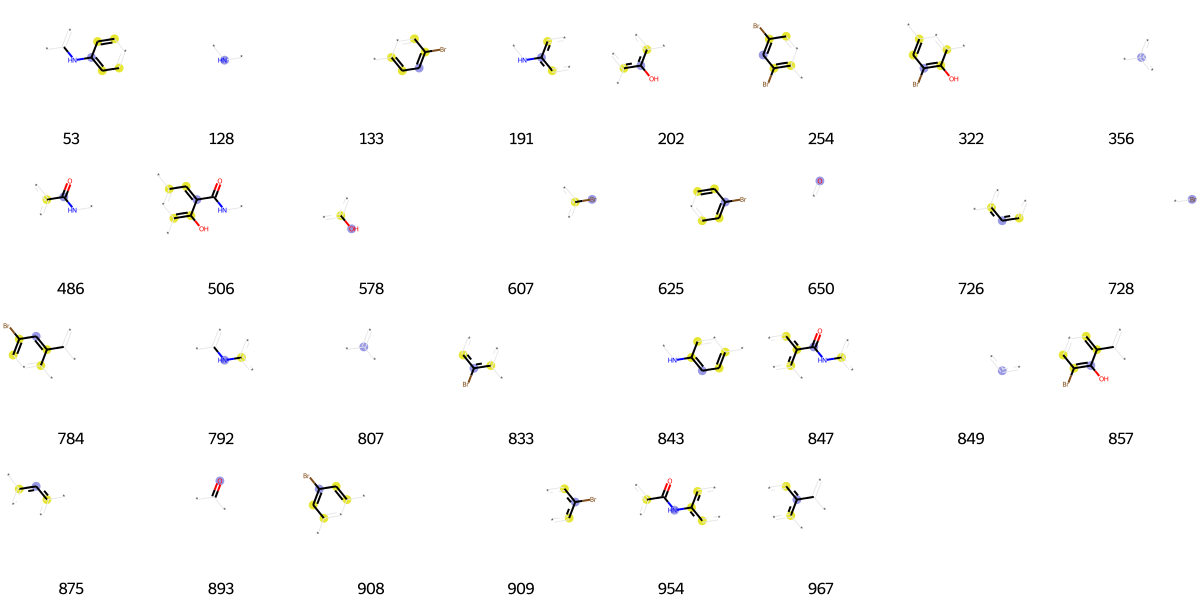

In [2553]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2554]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 38,
 45,
 62,
 73,
 79,
 80,
 90,
 101,
 111,
 118,
 189,
 192,
 227,
 238,
 249,
 260,
 274,
 314,
 323,
 356,
 367,
 369,
 370,
 378,
 486,
 553,
 563,
 572,
 650,
 692,
 695,
 698,
 699,
 706,
 715,
 721,
 749,
 750,
 757,
 783,
 790,
 802,
 807,
 814,
 829,
 831,
 849,
 875,
 888,
 891,
 898,
 908,
 935,
 966,
 1018]

In [2555]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[63,
 64,
 80,
 133,
 175,
 203,
 299,
 314,
 333,
 356,
 365,
 374,
 381,
 407,
 417,
 456,
 523,
 549,
 580,
 650,
 656,
 700,
 709,
 726,
 831,
 849,
 875,
 887,
 920,
 926,
 933,
 935,
 950,
 954,
 970,
 978,
 1014]

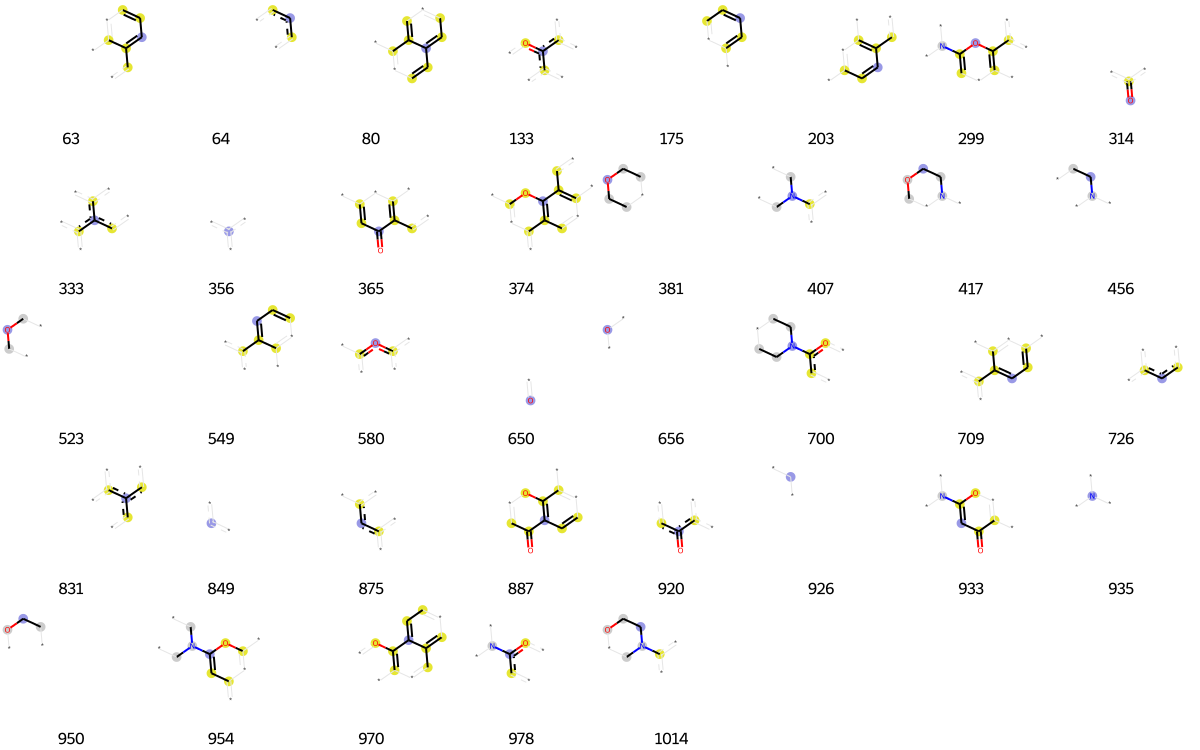

In [2556]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2557]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[4,
 23,
 40,
 80,
 85,
 90,
 314,
 338,
 356,
 394,
 423,
 432,
 650,
 659,
 663,
 700,
 721,
 750,
 755,
 806,
 849,
 855,
 881,
 927,
 953,
 980,
 994]

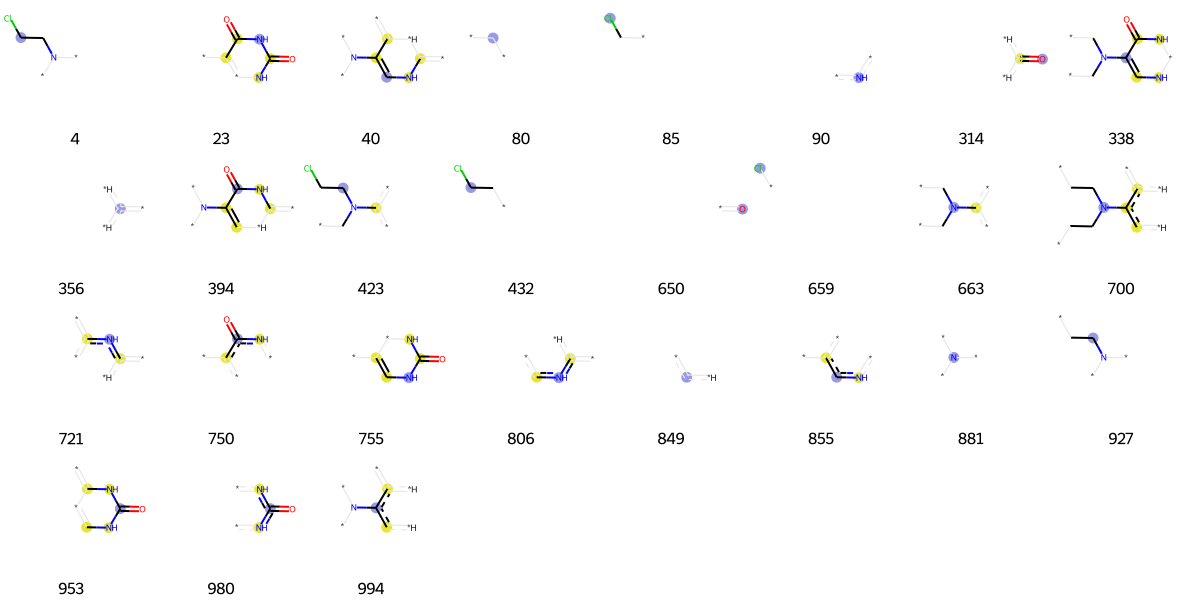

In [2558]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2559]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[289, 356, 578, 726, 745, 754, 807, 849]

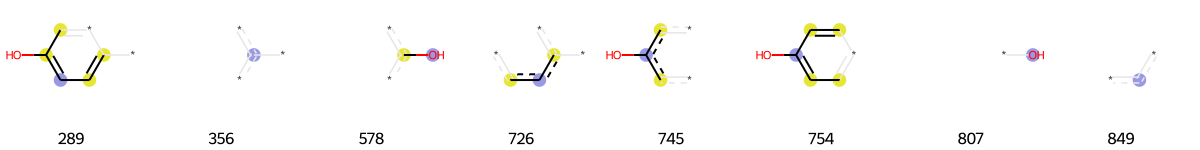

In [2560]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2561]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[9,
 21,
 26,
 33,
 43,
 52,
 63,
 64,
 68,
 73,
 90,
 117,
 119,
 143,
 147,
 175,
 213,
 217,
 233,
 277,
 316,
 343,
 356,
 373,
 378,
 382,
 410,
 433,
 511,
 523,
 650,
 698,
 715,
 721,
 726,
 733,
 759,
 793,
 801,
 807,
 828,
 831,
 838,
 849,
 863,
 875,
 893,
 935,
 951,
 961,
 967]

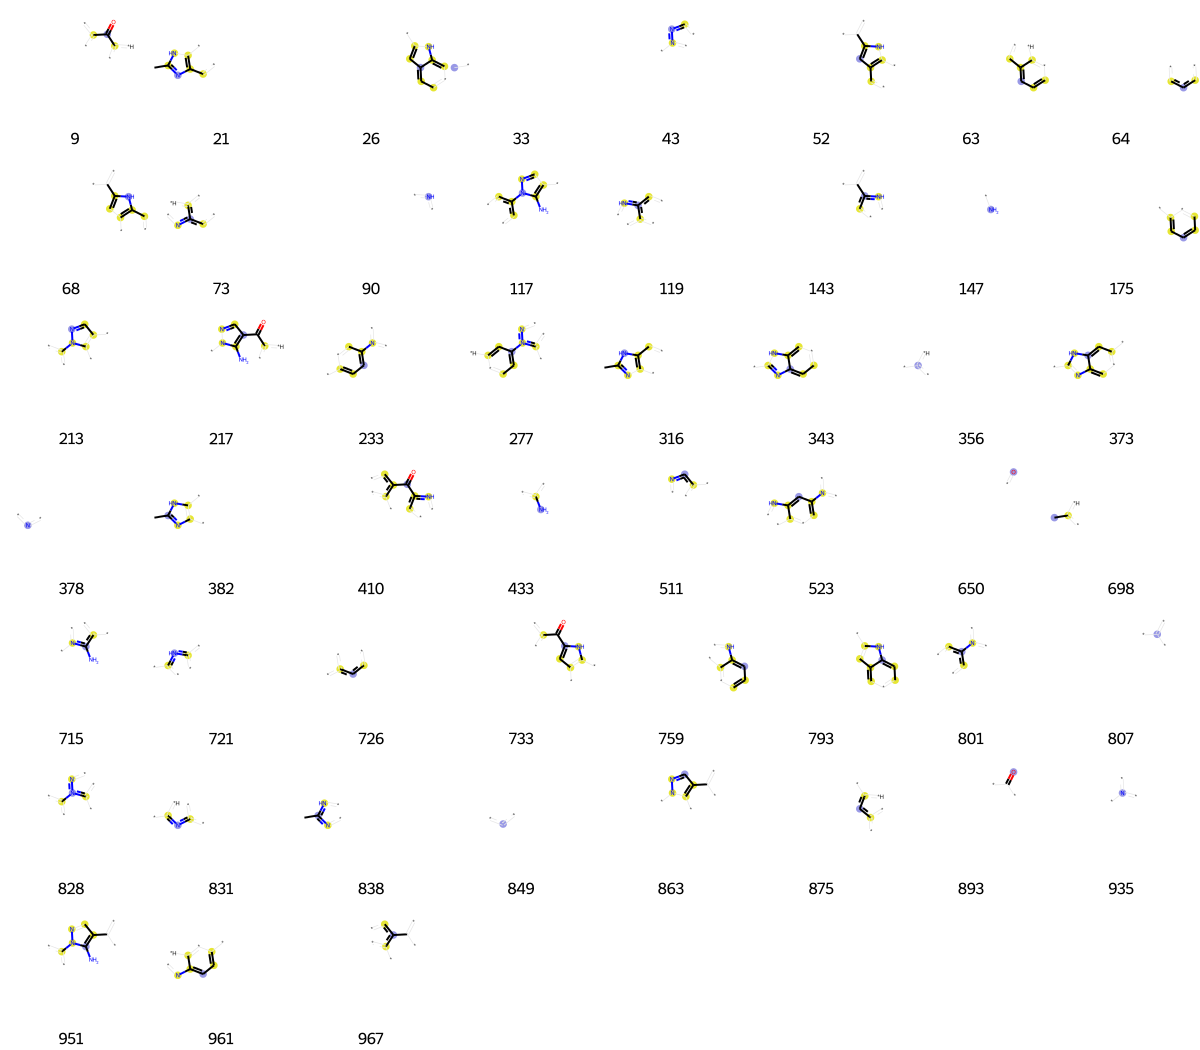

In [2562]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2563]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[9,
 33,
 64,
 80,
 104,
 175,
 202,
 294,
 322,
 333,
 356,
 361,
 368,
 460,
 500,
 515,
 549,
 555,
 565,
 578,
 580,
 586,
 607,
 650,
 656,
 726,
 728,
 775,
 778,
 784,
 807,
 833,
 849,
 871,
 875,
 878,
 893,
 894]

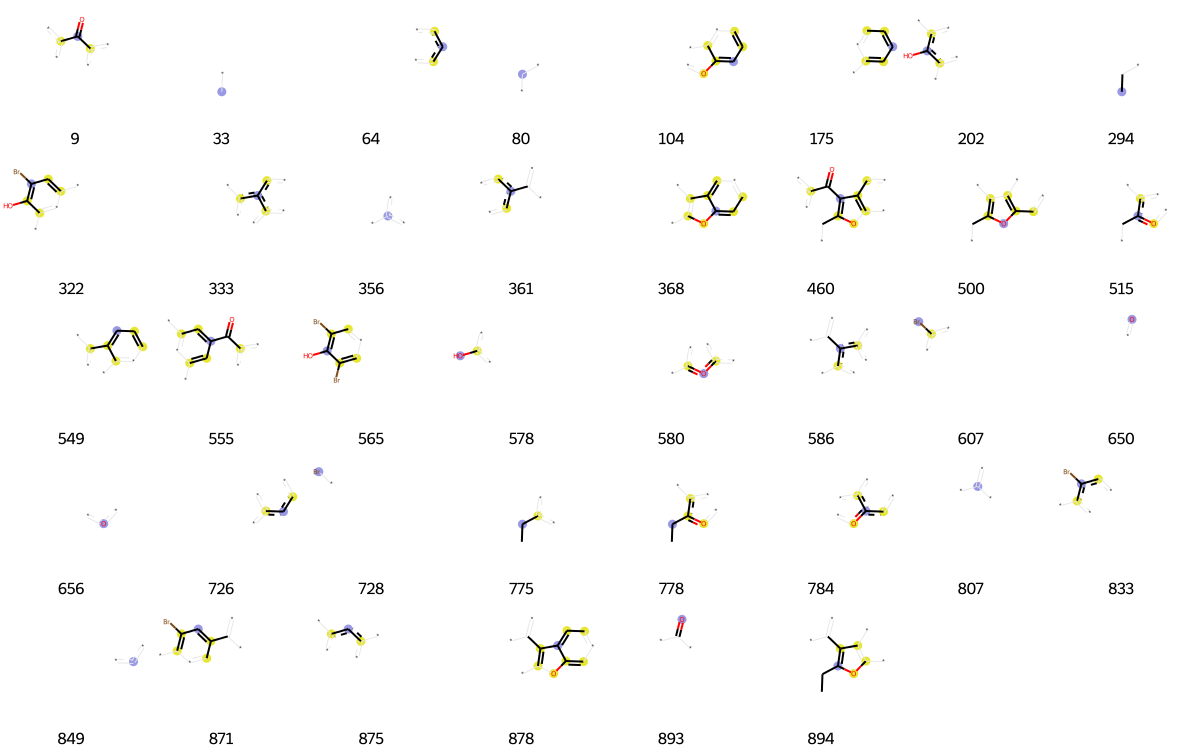

In [2564]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2565]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[25,
 64,
 90,
 175,
 254,
 306,
 314,
 356,
 389,
 456,
 542,
 551,
 640,
 650,
 686,
 714,
 726,
 731,
 784,
 801,
 829,
 849,
 926,
 935]

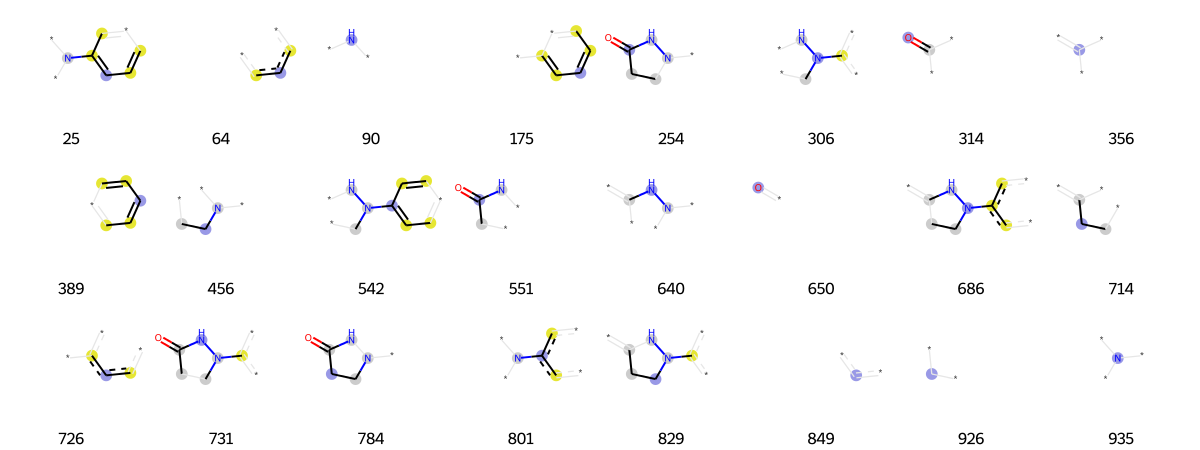

In [2566]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2567]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 43,
 63,
 64,
 90,
 175,
 202,
 203,
 258,
 301,
 315,
 322,
 356,
 378,
 394,
 405,
 412,
 428,
 438,
 489,
 598,
 601,
 629,
 692,
 693,
 698,
 721,
 725,
 726,
 753,
 830,
 831,
 849,
 862,
 875,
 897,
 910,
 935,
 1014,
 1023]

In [2568]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[10,
 25,
 27,
 36,
 44,
 64,
 90,
 175,
 226,
 255,
 301,
 314,
 356,
 389,
 639,
 650,
 726,
 816,
 849,
 926,
 927,
 950,
 1019]

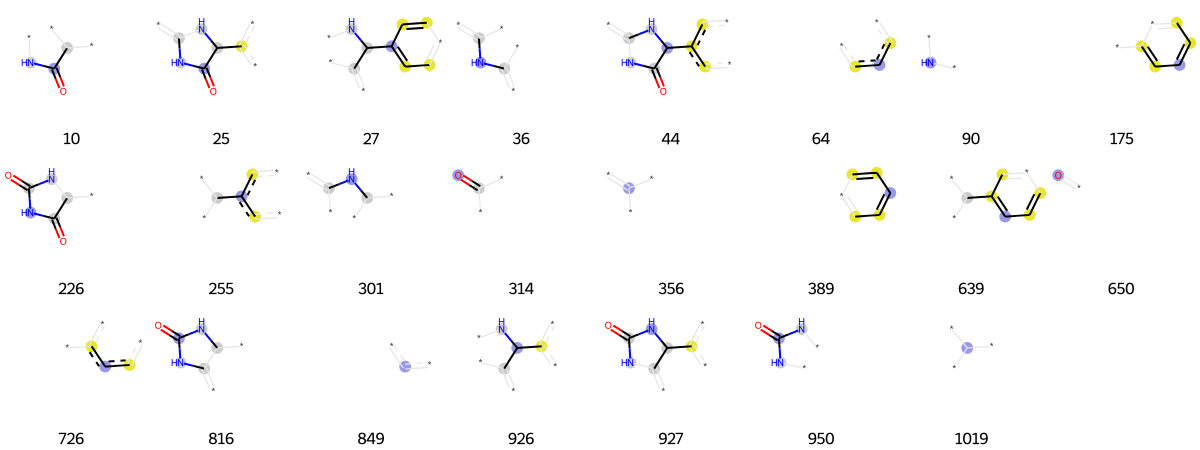

In [2569]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2570]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[33,
 36,
 57,
 75,
 80,
 84,
 98,
 127,
 130,
 138,
 182,
 184,
 242,
 253,
 292,
 294,
 301,
 314,
 327,
 345,
 356,
 364,
 408,
 436,
 455,
 519,
 529,
 534,
 559,
 622,
 649,
 650,
 674,
 714,
 717,
 748,
 798,
 807,
 841,
 849,
 884,
 909,
 915,
 926,
 928,
 974,
 1019]

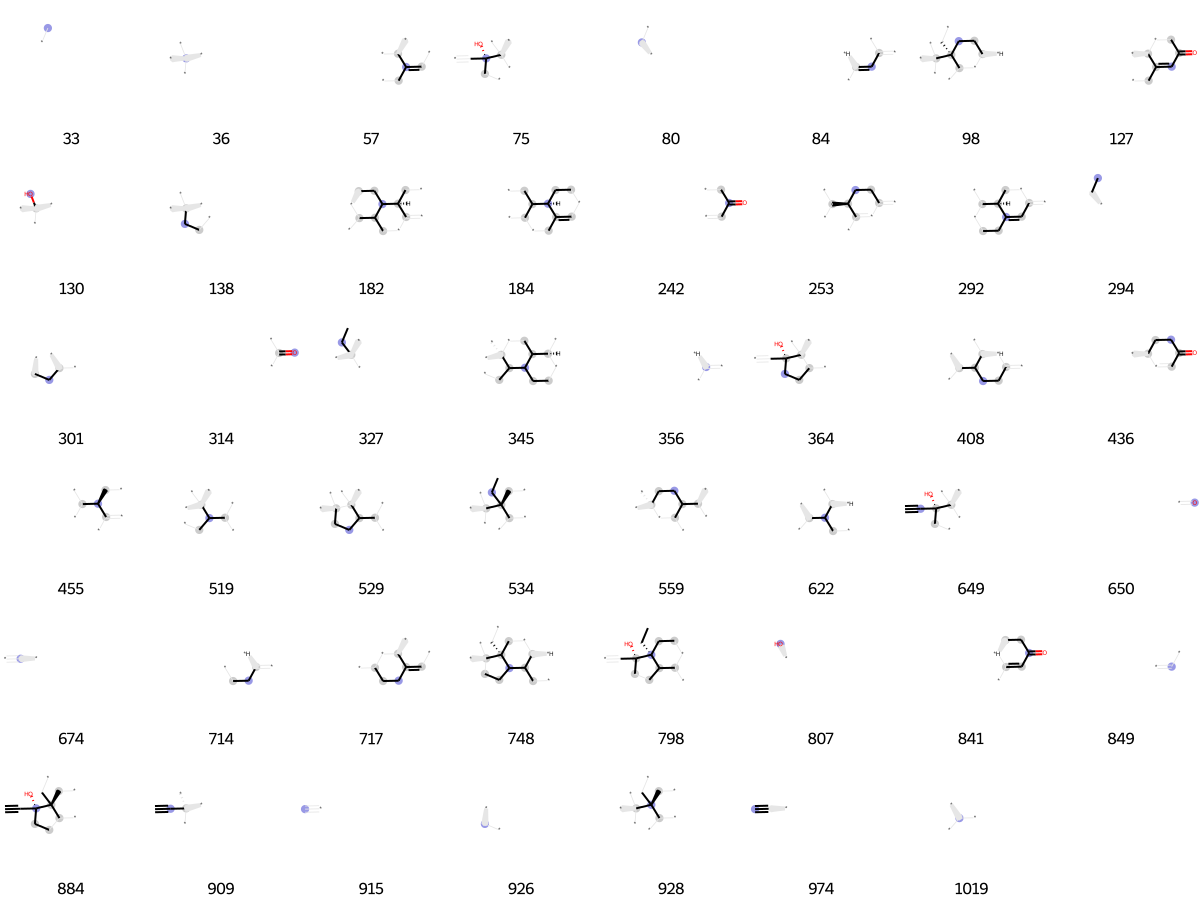

In [2571]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2572]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[2,
 4,
 84,
 89,
 147,
 151,
 290,
 356,
 377,
 378,
 407,
 433,
 444,
 456,
 463,
 527,
 569,
 680,
 715,
 748,
 831,
 849,
 870,
 875,
 926,
 935,
 938,
 974,
 986]

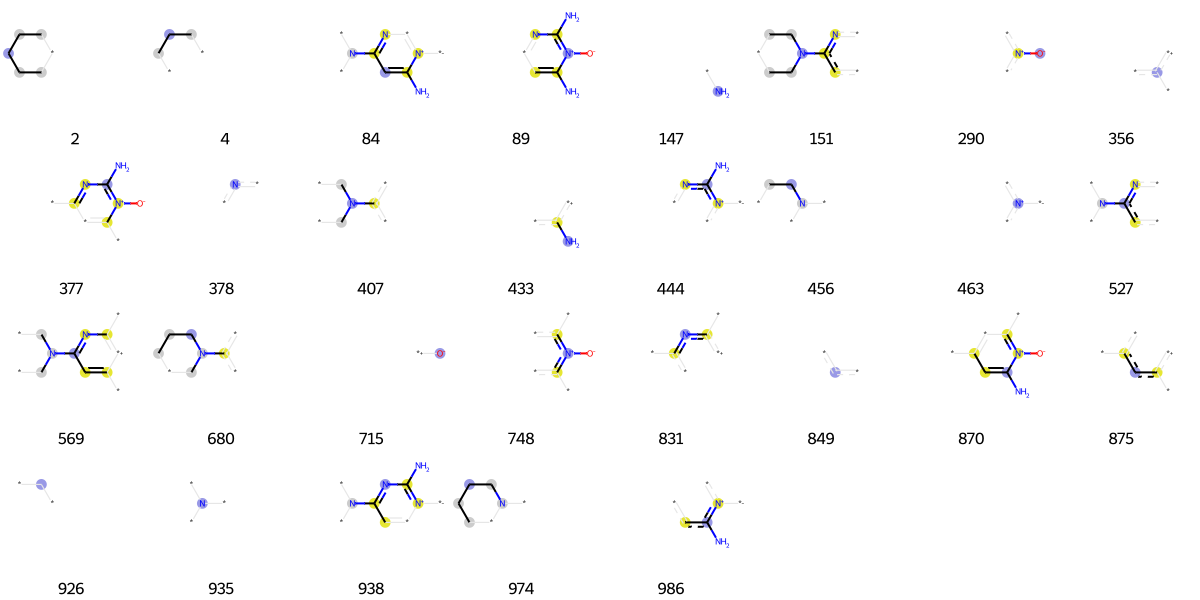

In [2573]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2574]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[36,
 39,
 80,
 90,
 130,
 196,
 222,
 301,
 314,
 356,
 366,
 389,
 456,
 527,
 650,
 735,
 802,
 807,
 855,
 926,
 935,
 941,
 976,
 1019]

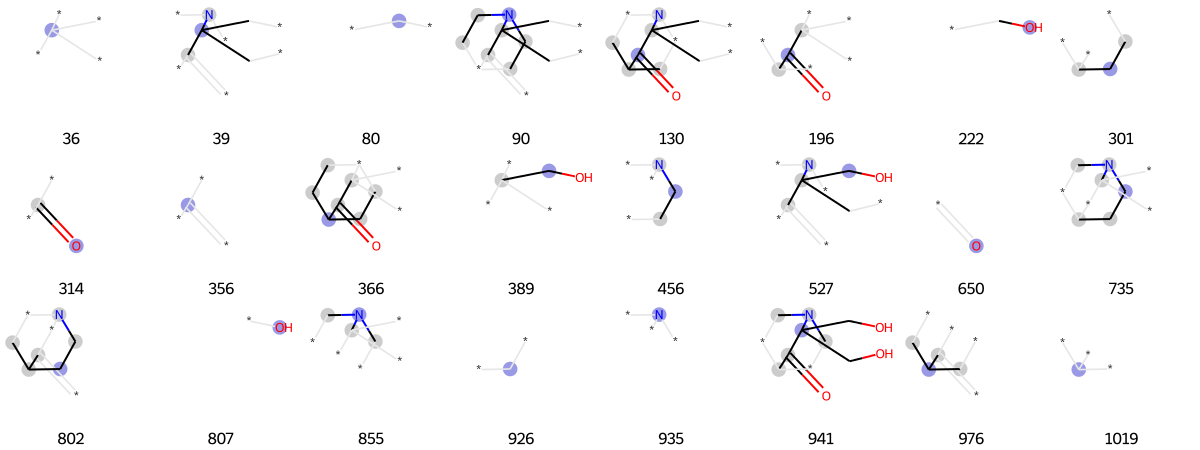

In [2575]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2576]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[2,
 4,
 33,
 128,
 136,
 165,
 185,
 216,
 252,
 271,
 289,
 319,
 322,
 351,
 356,
 366,
 378,
 456,
 486,
 490,
 512,
 516,
 539,
 561,
 650,
 659,
 695,
 698,
 714,
 718,
 726,
 772,
 781,
 807,
 816,
 820,
 828,
 831,
 841,
 849,
 850,
 871,
 875,
 891,
 892,
 893,
 896,
 926,
 932,
 935,
 947,
 970,
 974,
 999,
 1020]

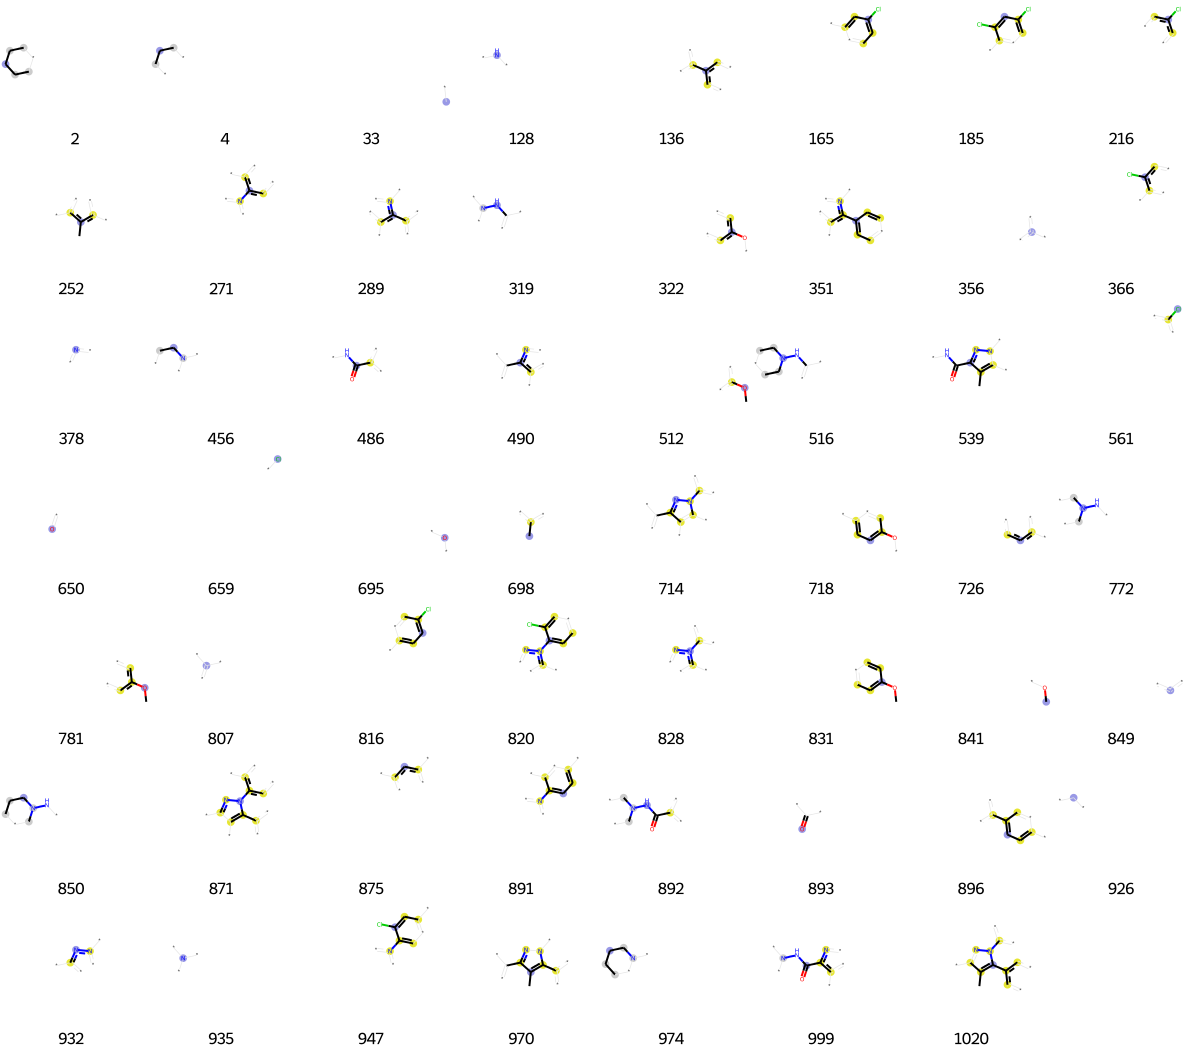

In [2577]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2578]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[19,
 33,
 40,
 45,
 64,
 77,
 100,
 121,
 128,
 191,
 212,
 218,
 253,
 271,
 322,
 356,
 360,
 363,
 375,
 377,
 378,
 385,
 437,
 456,
 459,
 511,
 527,
 562,
 579,
 593,
 607,
 650,
 703,
 714,
 726,
 761,
 792,
 807,
 816,
 831,
 842,
 849,
 860,
 864,
 875,
 893,
 926,
 935,
 981]

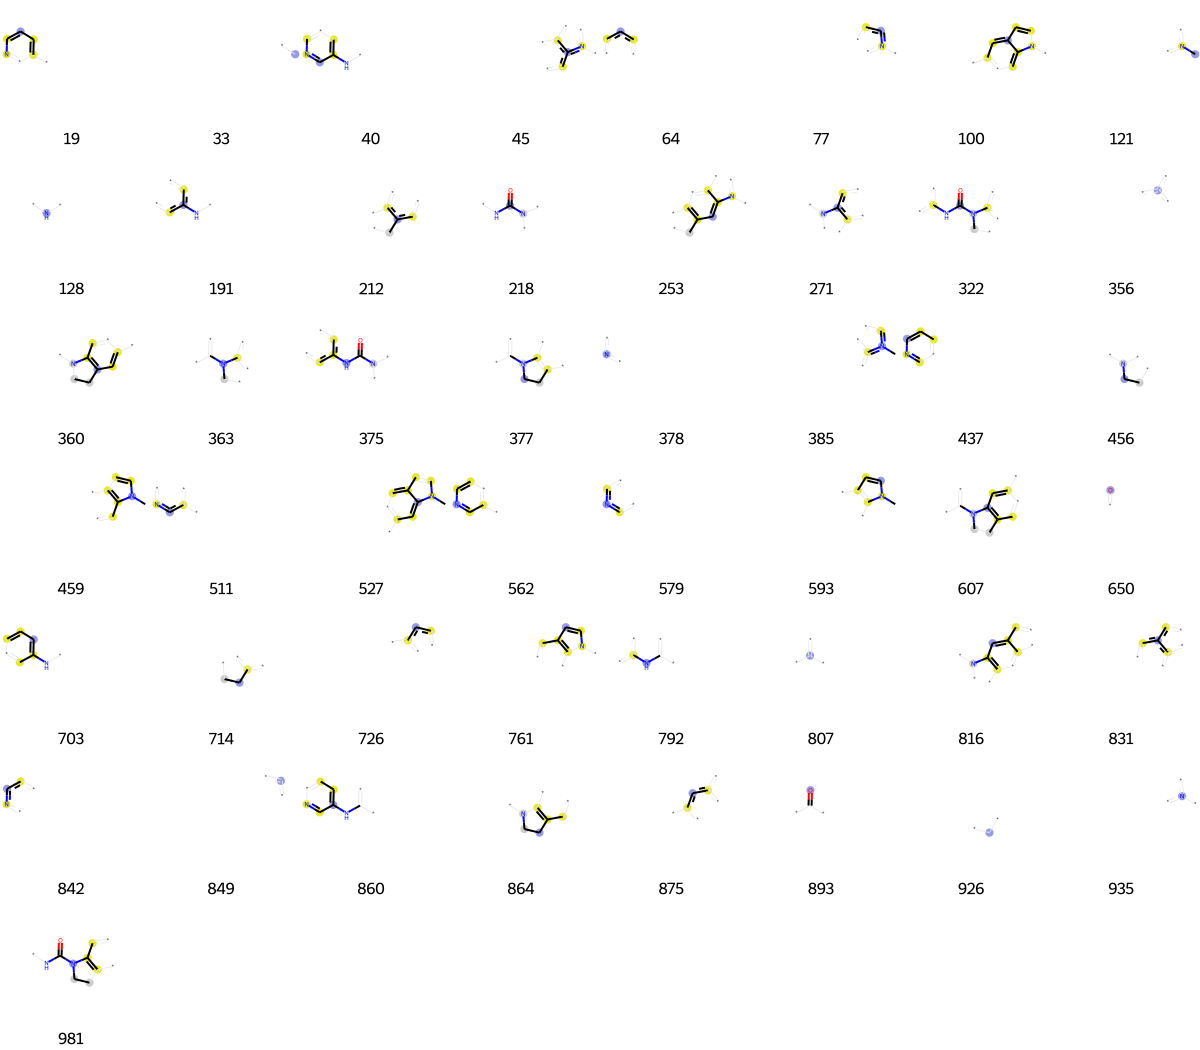

In [2579]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2580]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[11,
 15,
 32,
 33,
 64,
 90,
 114,
 136,
 155,
 160,
 179,
 260,
 286,
 315,
 323,
 325,
 340,
 356,
 378,
 392,
 394,
 441,
 448,
 599,
 623,
 656,
 698,
 707,
 721,
 726,
 738,
 776,
 827,
 831,
 839,
 849,
 851,
 875,
 881,
 896,
 926,
 953,
 956,
 980,
 996]

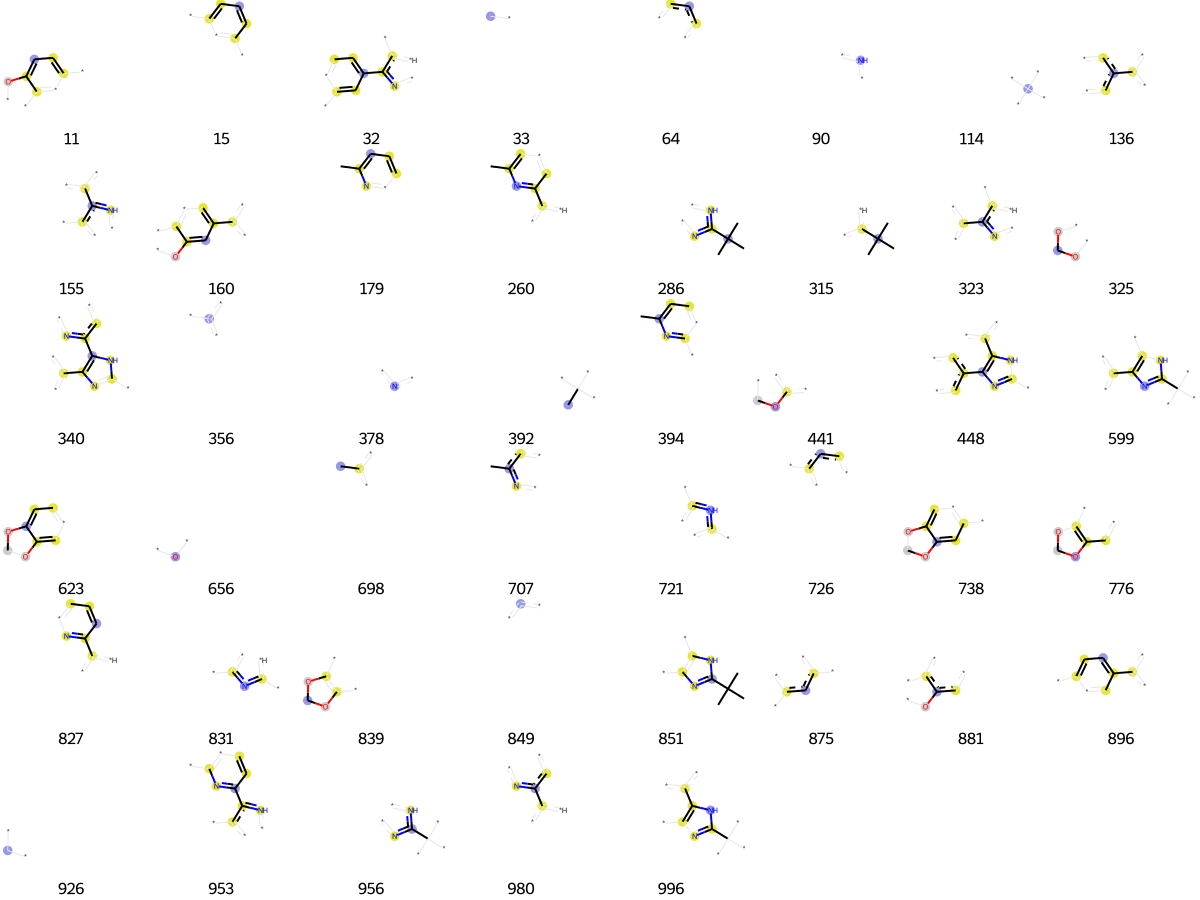

In [2581]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2582]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[41,
 64,
 80,
 128,
 133,
 135,
 136,
 147,
 175,
 199,
 271,
 280,
 288,
 289,
 314,
 326,
 352,
 356,
 378,
 389,
 547,
 588,
 591,
 607,
 624,
 650,
 665,
 677,
 724,
 726,
 728,
 732,
 736,
 766,
 770,
 798,
 807,
 814,
 825,
 849,
 875,
 881,
 891,
 893,
 909,
 926,
 935,
 967]

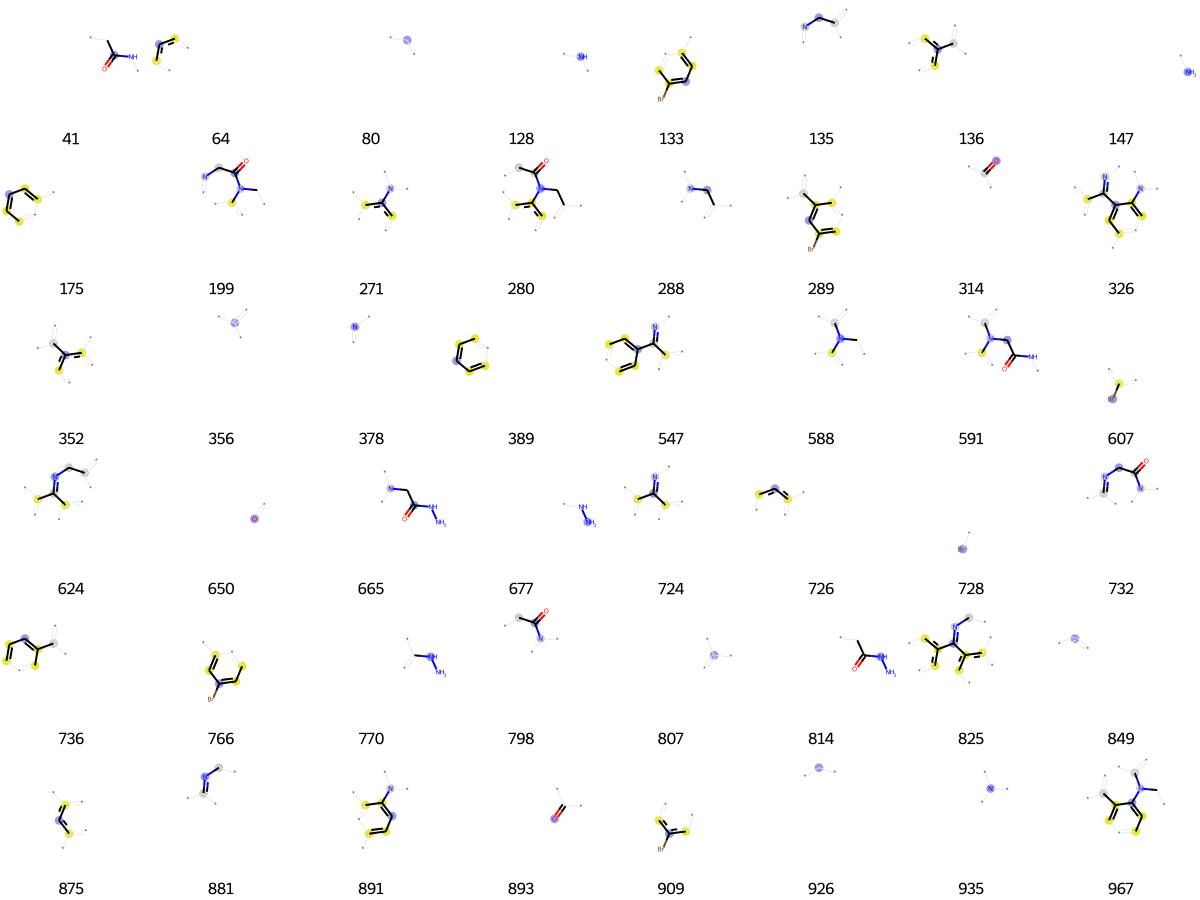

In [2583]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2584]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[41, 58, 221, 233, 322, 622, 656, 802, 807, 849, 899, 926, 1019]

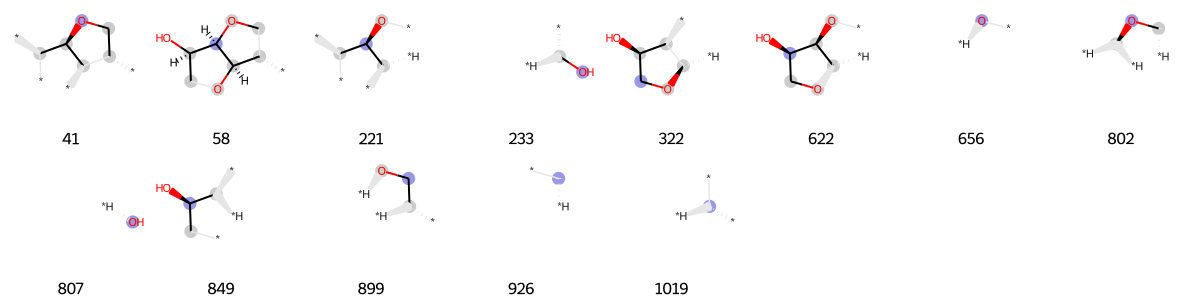

In [2585]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2586]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[0,
 1,
 14,
 15,
 33,
 42,
 54,
 64,
 65,
 78,
 79,
 80,
 82,
 117,
 128,
 136,
 140,
 147,
 283,
 290,
 338,
 348,
 356,
 361,
 463,
 486,
 507,
 554,
 573,
 623,
 641,
 650,
 673,
 695,
 715,
 726,
 730,
 736,
 791,
 799,
 807,
 841,
 849,
 855,
 875,
 880,
 893,
 896,
 900,
 940,
 961,
 966,
 1003]

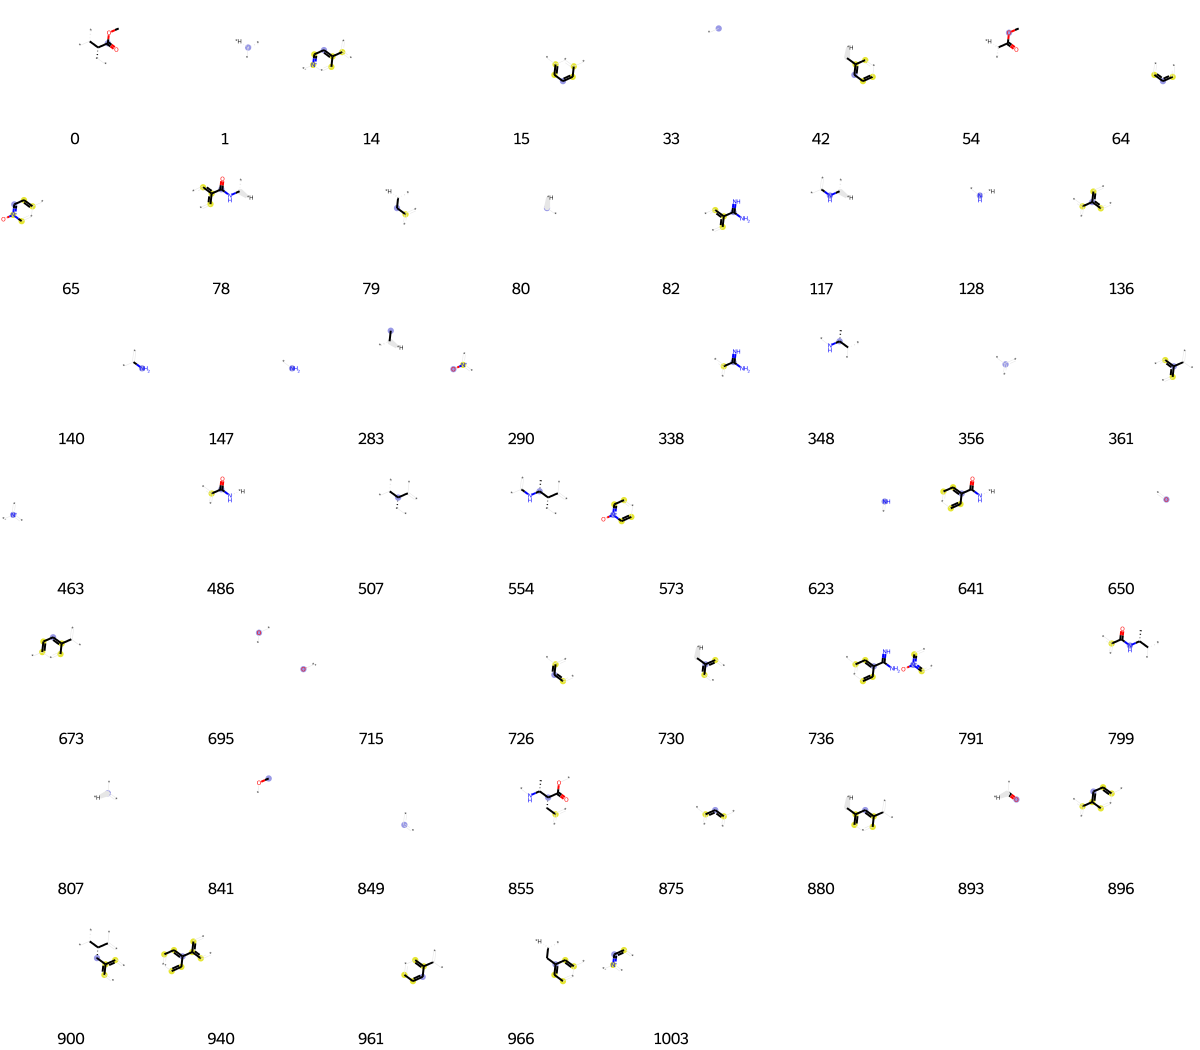

In [2587]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2588]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[19,
 33,
 61,
 64,
 84,
 90,
 114,
 128,
 134,
 136,
 191,
 193,
 200,
 219,
 236,
 257,
 293,
 356,
 361,
 367,
 378,
 393,
 399,
 428,
 429,
 437,
 443,
 458,
 464,
 486,
 491,
 510,
 511,
 526,
 539,
 555,
 558,
 562,
 570,
 571,
 579,
 595,
 650,
 658,
 667,
 673,
 698,
 707,
 726,
 736,
 771,
 787,
 792,
 795,
 801,
 807,
 809,
 831,
 842,
 849,
 875,
 893,
 904,
 932,
 935,
 954,
 980,
 990,
 1012]

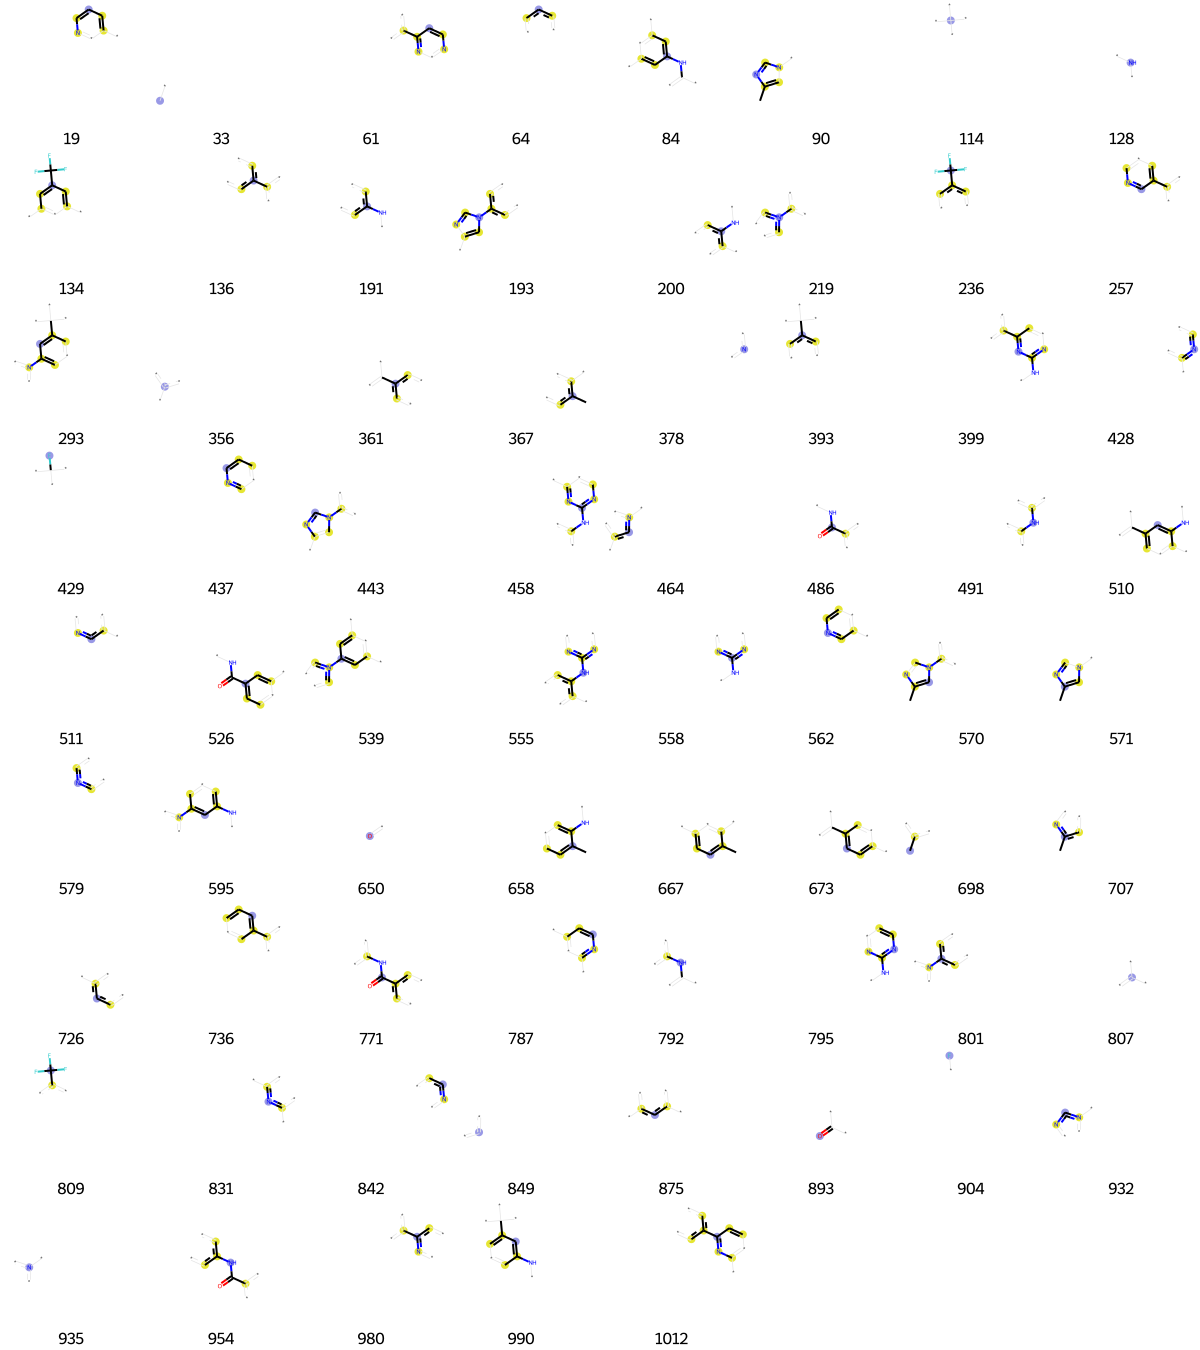

In [2589]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2590]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 4,
 33,
 80,
 114,
 122,
 140,
 147,
 158,
 188,
 294,
 314,
 316,
 356,
 456,
 520,
 650,
 679,
 714,
 762,
 798,
 807,
 872,
 893,
 926,
 935,
 953,
 1015]

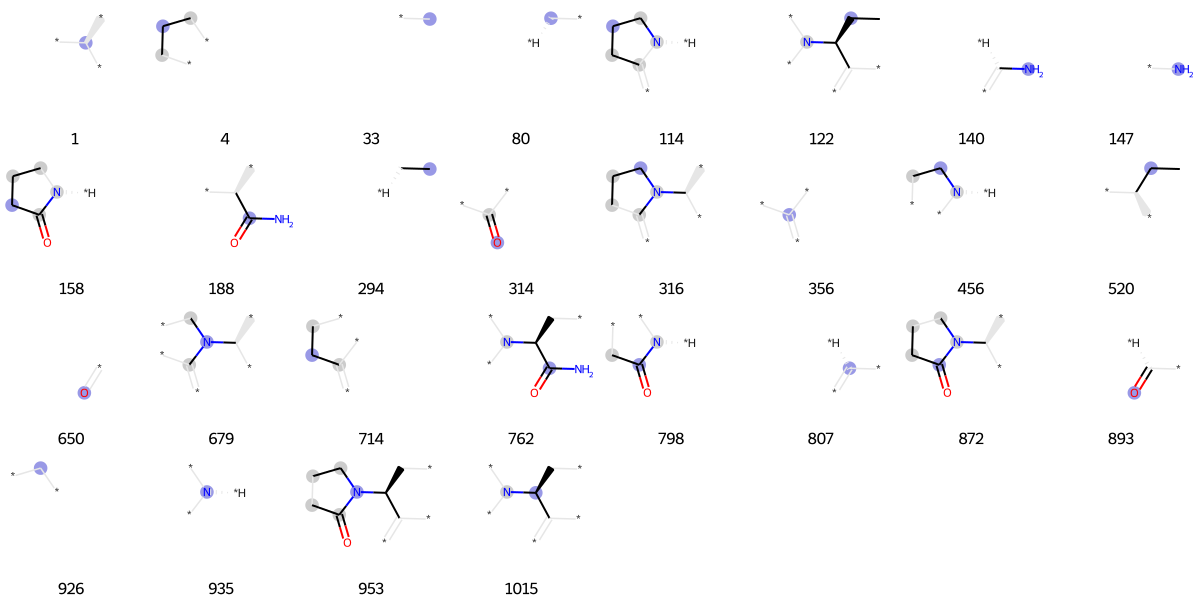

In [2591]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2592]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 80,
 119,
 128,
 164,
 190,
 197,
 231,
 232,
 233,
 239,
 245,
 268,
 271,
 314,
 356,
 367,
 407,
 433,
 456,
 580,
 606,
 608,
 650,
 656,
 675,
 699,
 716,
 719,
 726,
 731,
 739,
 750,
 789,
 801,
 807,
 816,
 849,
 872,
 875,
 891,
 893,
 904,
 906,
 926,
 935,
 952,
 965,
 983,
 1017,
 1019]

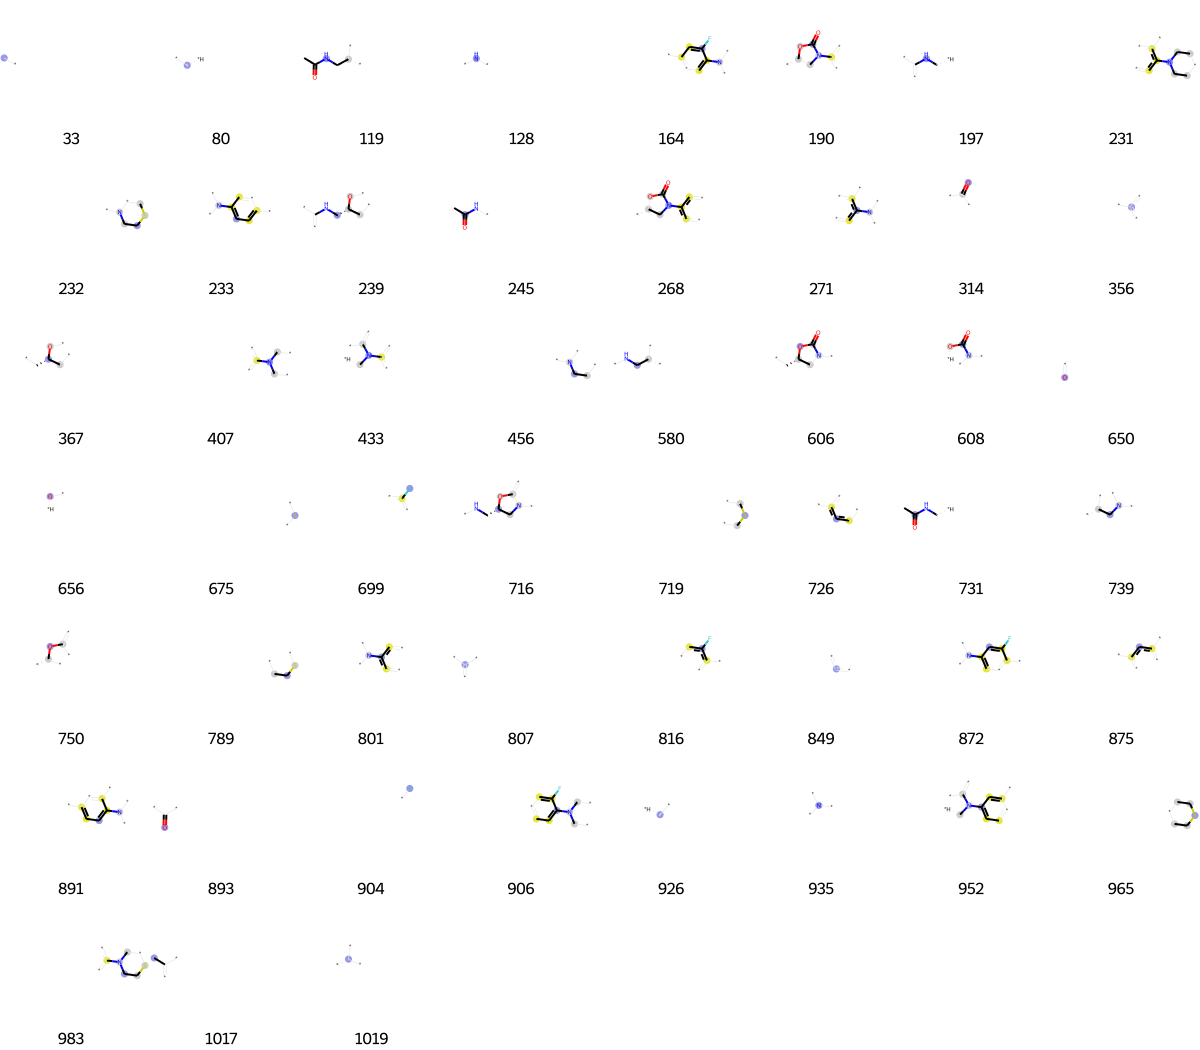

In [2593]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2594]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 80,
 84,
 115,
 119,
 148,
 160,
 204,
 219,
 294,
 314,
 356,
 365,
 372,
 419,
 420,
 452,
 578,
 591,
 637,
 650,
 710,
 747,
 794,
 798,
 807,
 849,
 886,
 887]

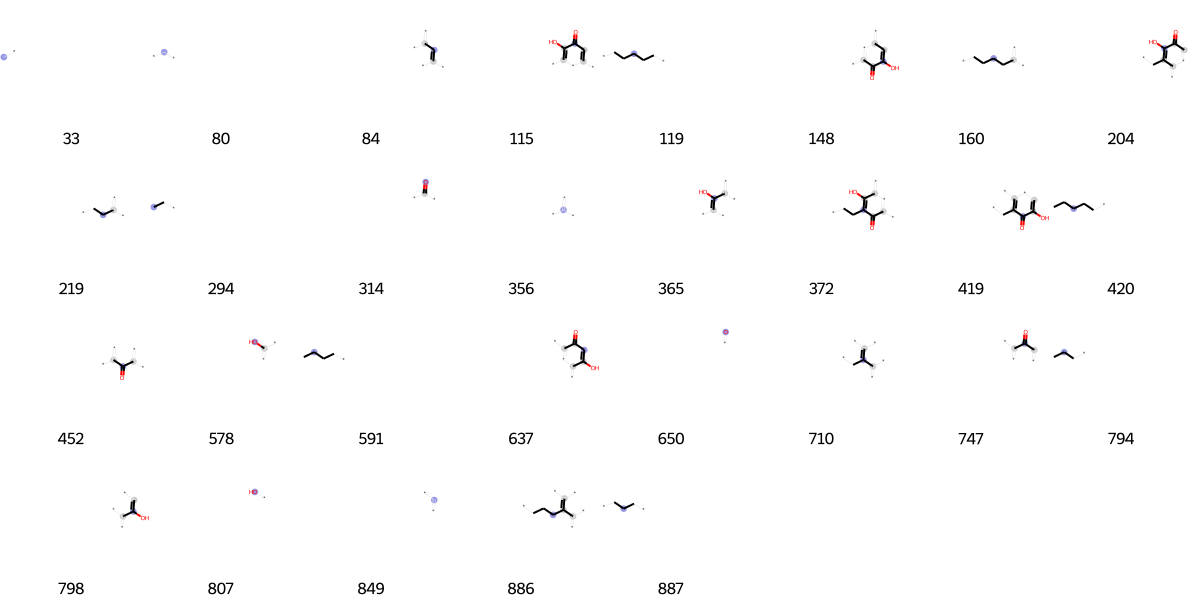

In [2595]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2596]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[16,
 32,
 33,
 46,
 49,
 80,
 106,
 114,
 136,
 140,
 162,
 168,
 216,
 231,
 241,
 252,
 310,
 313,
 356,
 362,
 378,
 383,
 392,
 428,
 469,
 482,
 487,
 547,
 550,
 561,
 574,
 582,
 629,
 650,
 659,
 675,
 695,
 698,
 700,
 710,
 723,
 724,
 726,
 807,
 816,
 820,
 834,
 835,
 849,
 893,
 896,
 917,
 935,
 953,
 969,
 1004,
 1019]

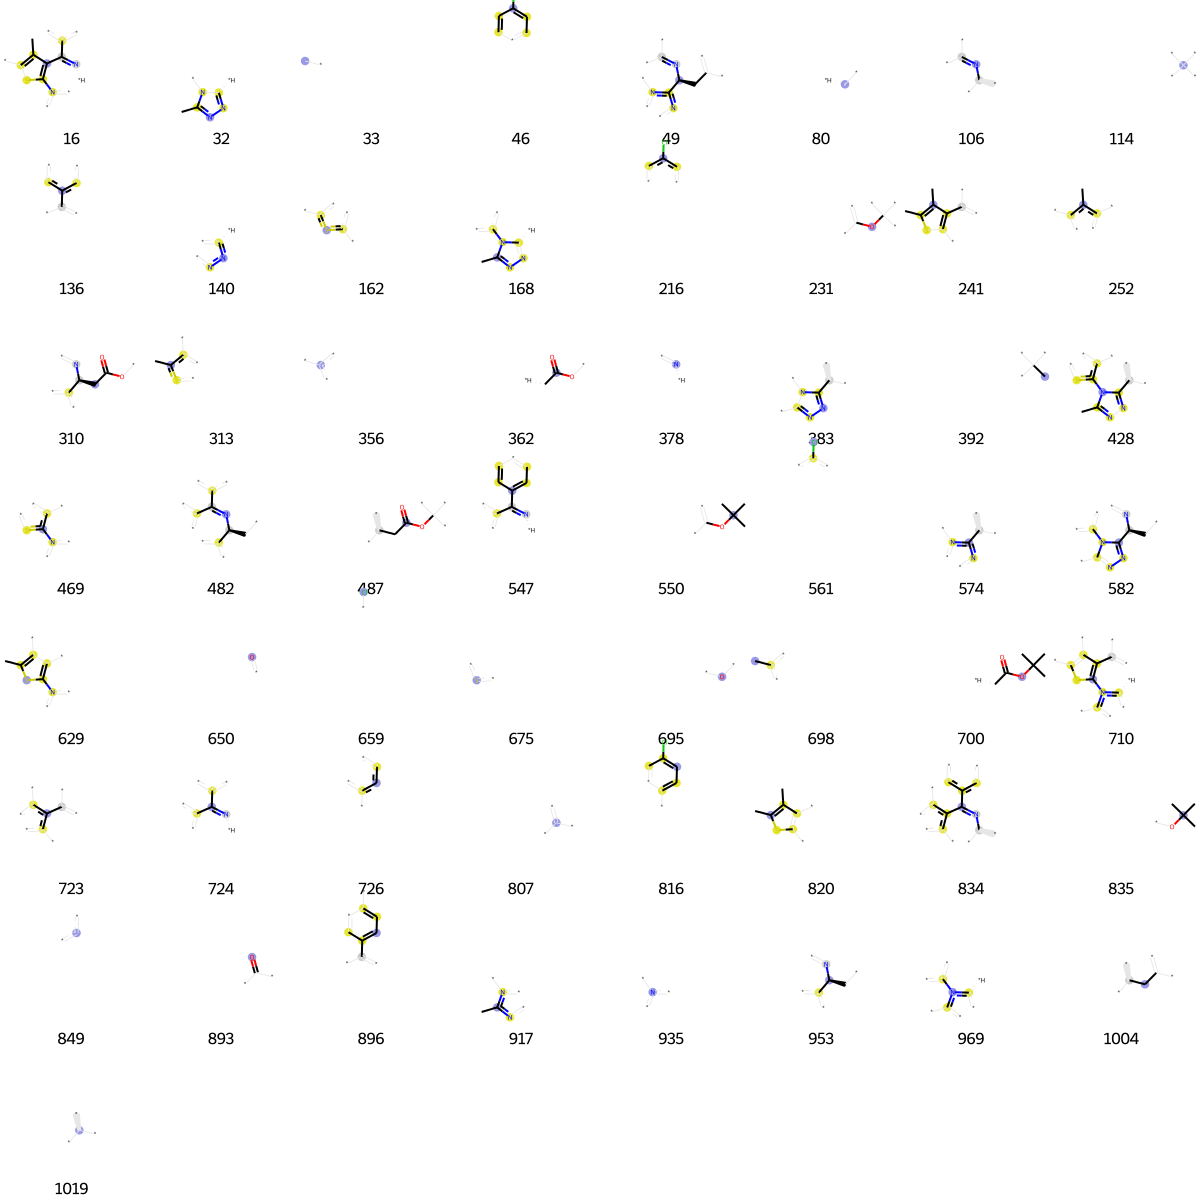

In [2597]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2598]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[3,
 4,
 64,
 131,
 175,
 190,
 206,
 212,
 233,
 356,
 371,
 389,
 421,
 457,
 478,
 549,
 556,
 619,
 650,
 684,
 694,
 714,
 726,
 807,
 849,
 892,
 893,
 921,
 926,
 976,
 998,
 1019]

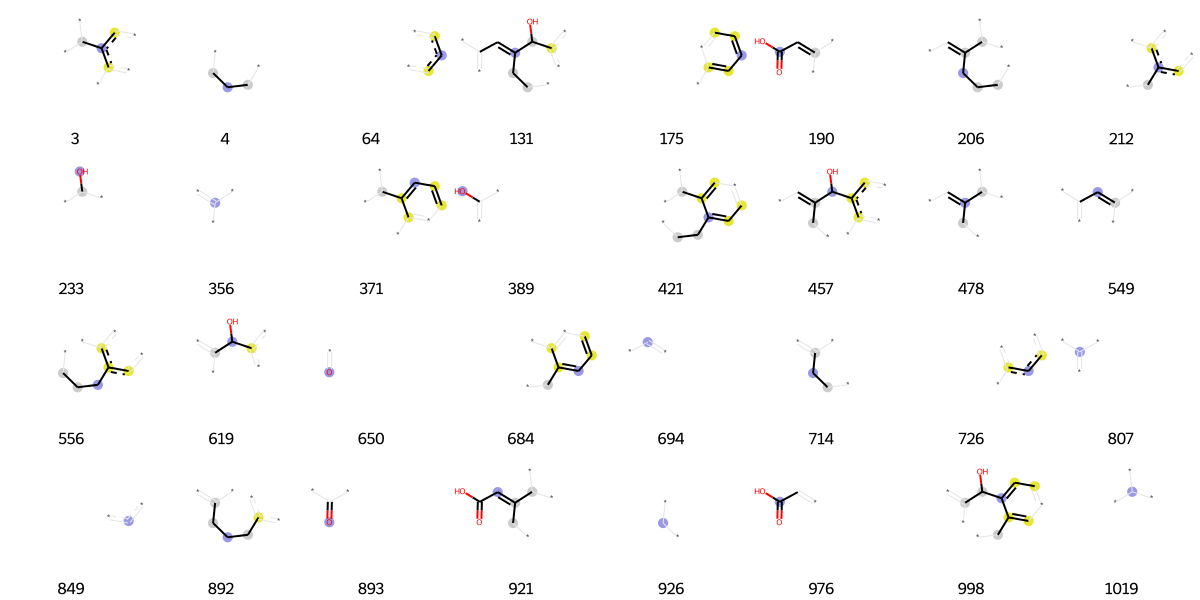

In [2599]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2600]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 46,
 64,
 78,
 79,
 80,
 90,
 117,
 119,
 128,
 175,
 216,
 325,
 328,
 333,
 356,
 361,
 364,
 389,
 411,
 486,
 549,
 561,
 583,
 600,
 641,
 648,
 650,
 659,
 673,
 726,
 736,
 759,
 806,
 807,
 816,
 820,
 849,
 851,
 855,
 893,
 913,
 946]

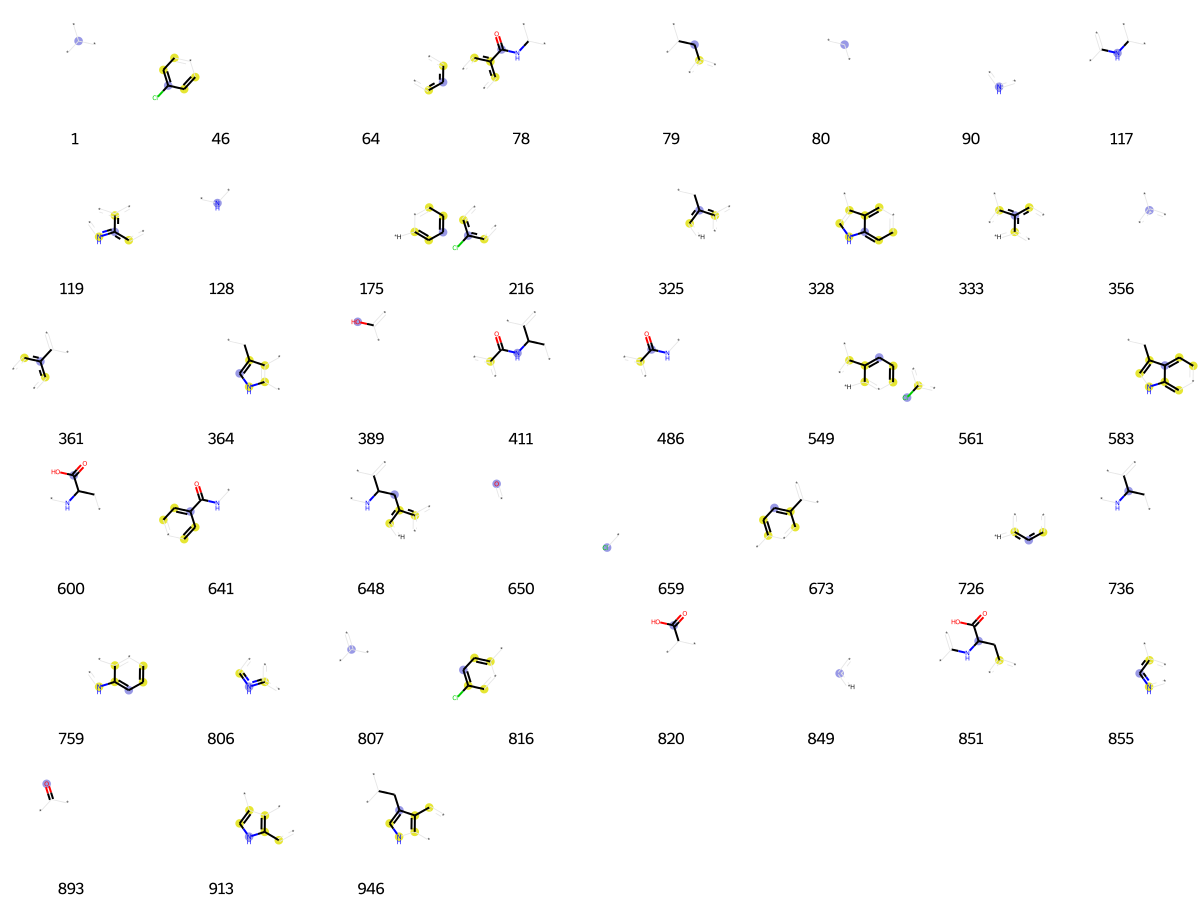

In [2601]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2602]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 15,
 33,
 52,
 64,
 76,
 128,
 132,
 147,
 283,
 356,
 367,
 381,
 461,
 573,
 650,
 698,
 726,
 786,
 792,
 807,
 849,
 882,
 893,
 931,
 975]

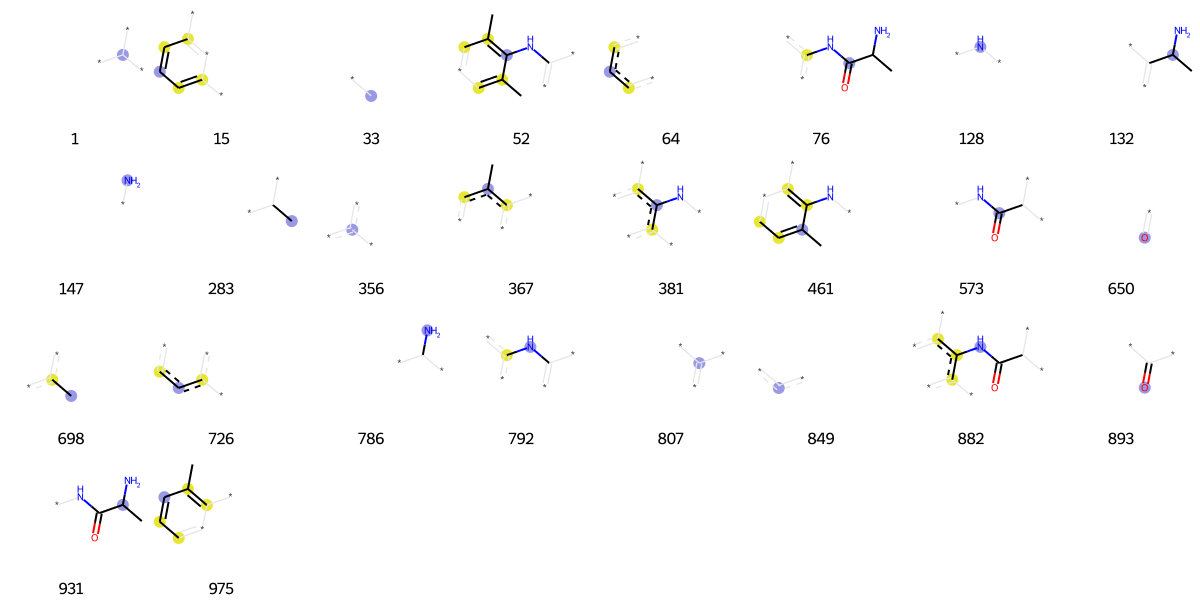

In [2603]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2604]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[53,
 80,
 84,
 147,
 158,
 191,
 222,
 226,
 233,
 238,
 254,
 268,
 295,
 299,
 350,
 357,
 390,
 452,
 463,
 466,
 488,
 492,
 533,
 545,
 592,
 610,
 650,
 656,
 695,
 740,
 782,
 807,
 808,
 820,
 838,
 839,
 869,
 882,
 895,
 897,
 926,
 952,
 953,
 981,
 1019]

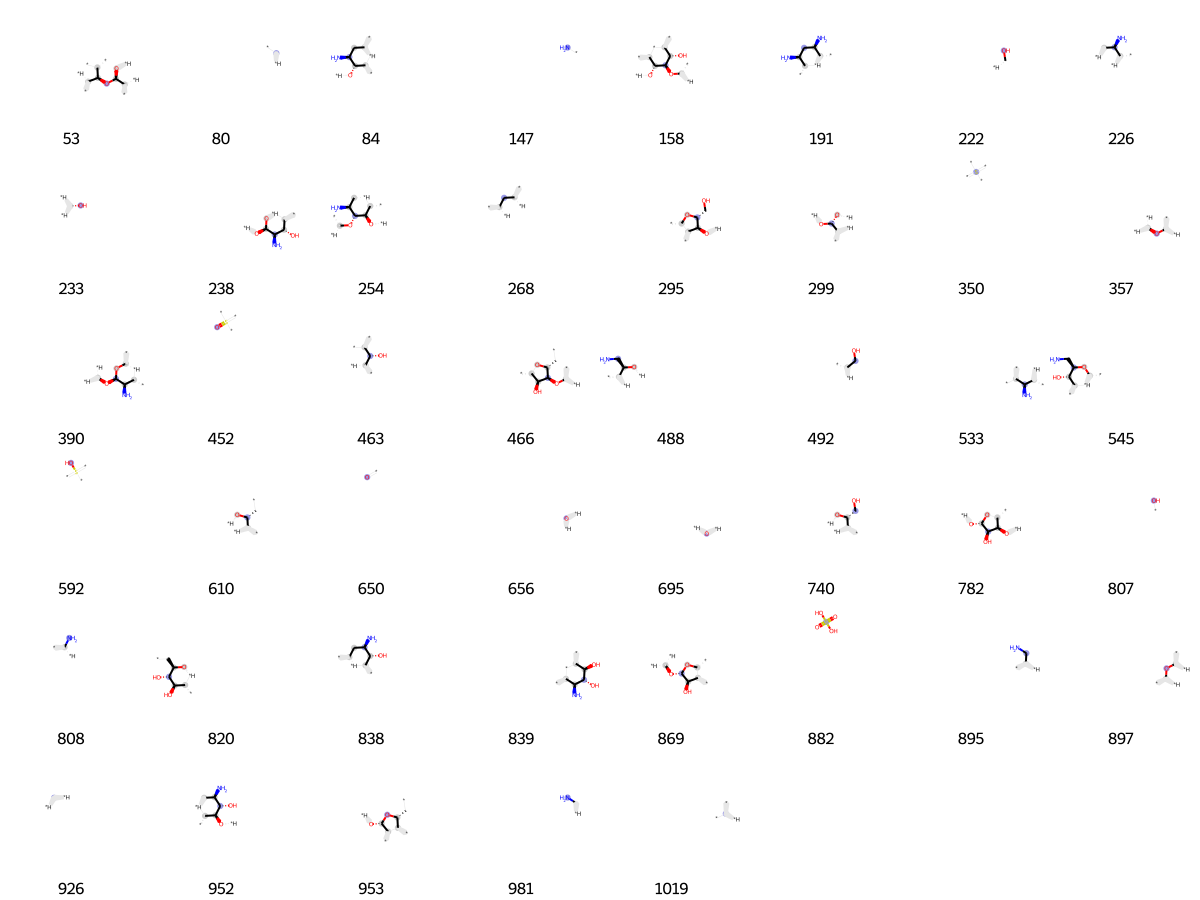

In [2605]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2606]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[4,
 36,
 80,
 122,
 128,
 130,
 134,
 172,
 193,
 242,
 268,
 274,
 301,
 360,
 383,
 411,
 416,
 422,
 446,
 454,
 456,
 471,
 472,
 492,
 555,
 644,
 650,
 674,
 679,
 722,
 790,
 807,
 877,
 888,
 893,
 902,
 922,
 926,
 935,
 952,
 968,
 985,
 1009,
 1019]

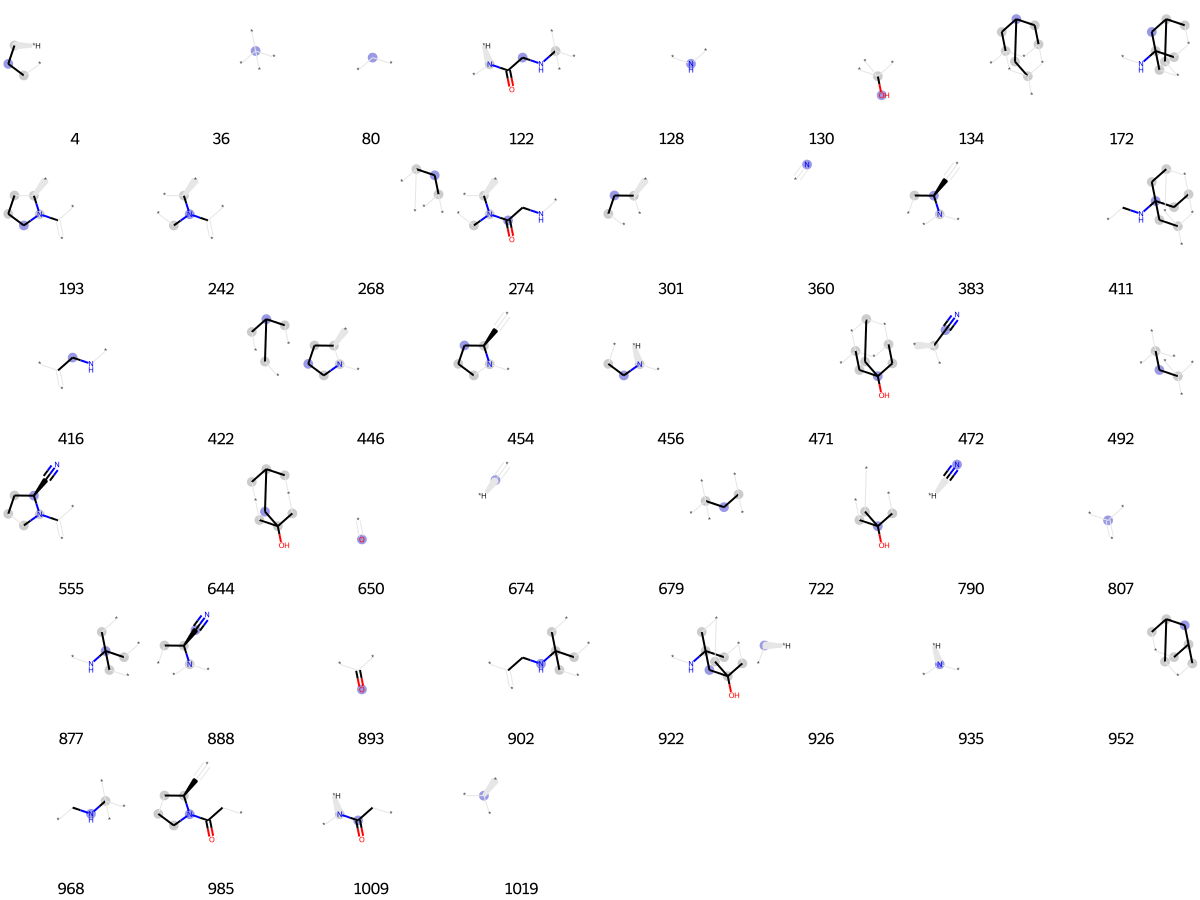

In [2607]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2608]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[2,
 4,
 15,
 31,
 33,
 49,
 64,
 72,
 80,
 97,
 123,
 128,
 136,
 139,
 176,
 200,
 284,
 288,
 301,
 310,
 324,
 329,
 355,
 356,
 507,
 561,
 626,
 650,
 676,
 690,
 694,
 695,
 726,
 730,
 737,
 783,
 786,
 807,
 835,
 841,
 849,
 872,
 874,
 875,
 881,
 890,
 893,
 896,
 926,
 940,
 960,
 974,
 1006,
 1009,
 1017,
 1019]

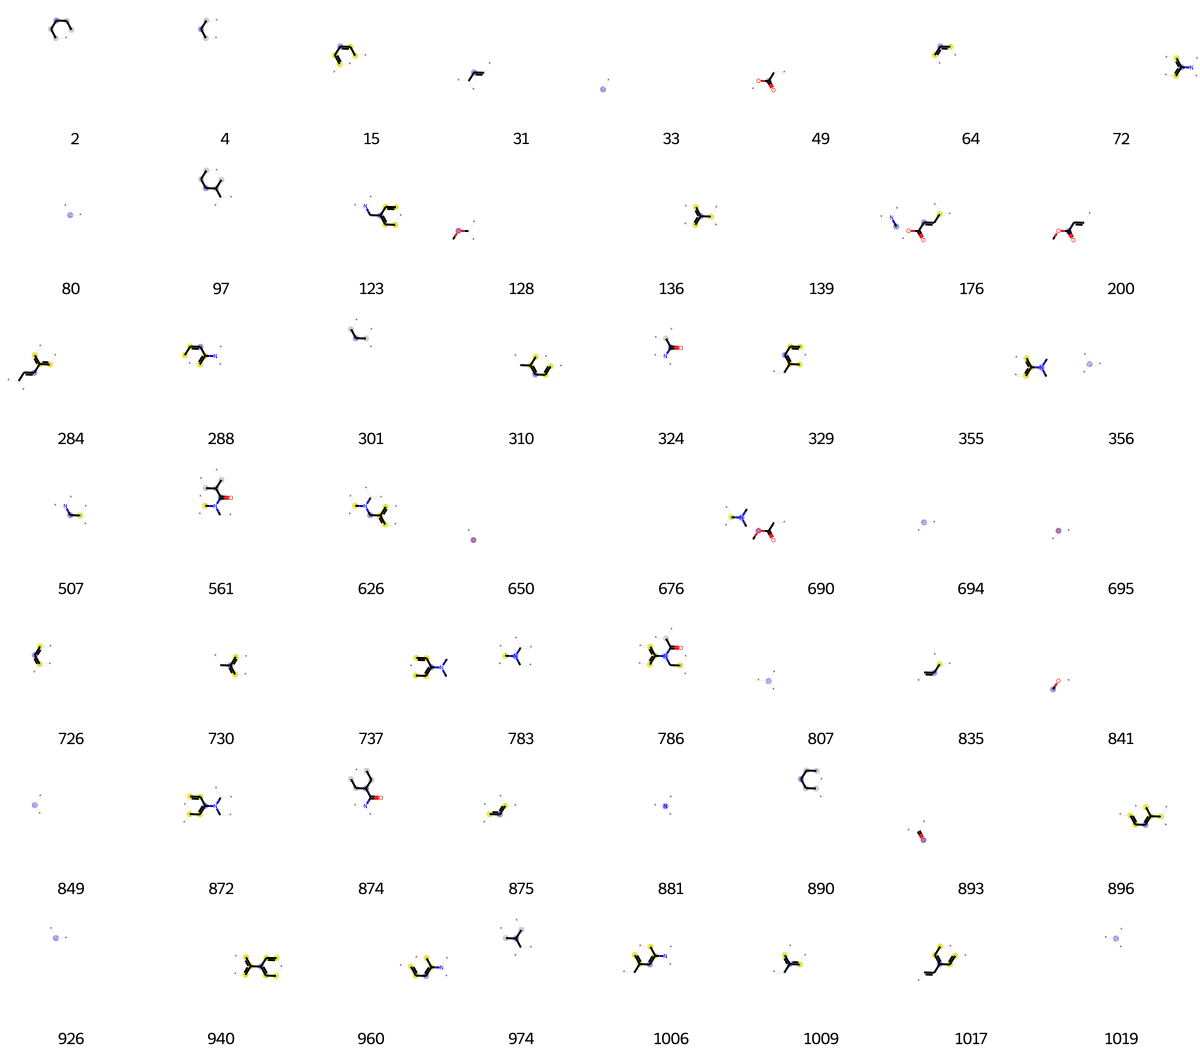

In [2609]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2610]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[80, 86, 119, 243, 263, 389, 540, 650, 713, 807, 887, 893]

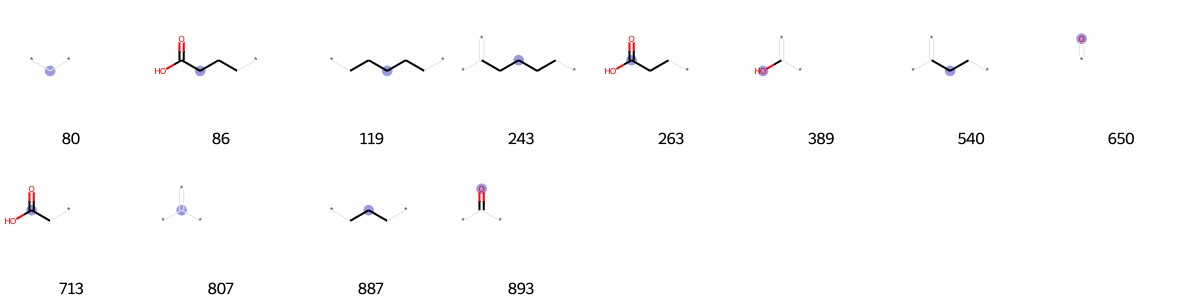

In [2611]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2612]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[15,
 29,
 32,
 61,
 64,
 94,
 147,
 151,
 260,
 285,
 301,
 335,
 356,
 378,
 407,
 456,
 514,
 527,
 561,
 659,
 726,
 734,
 808,
 831,
 849,
 879,
 926,
 935,
 970,
 1019]

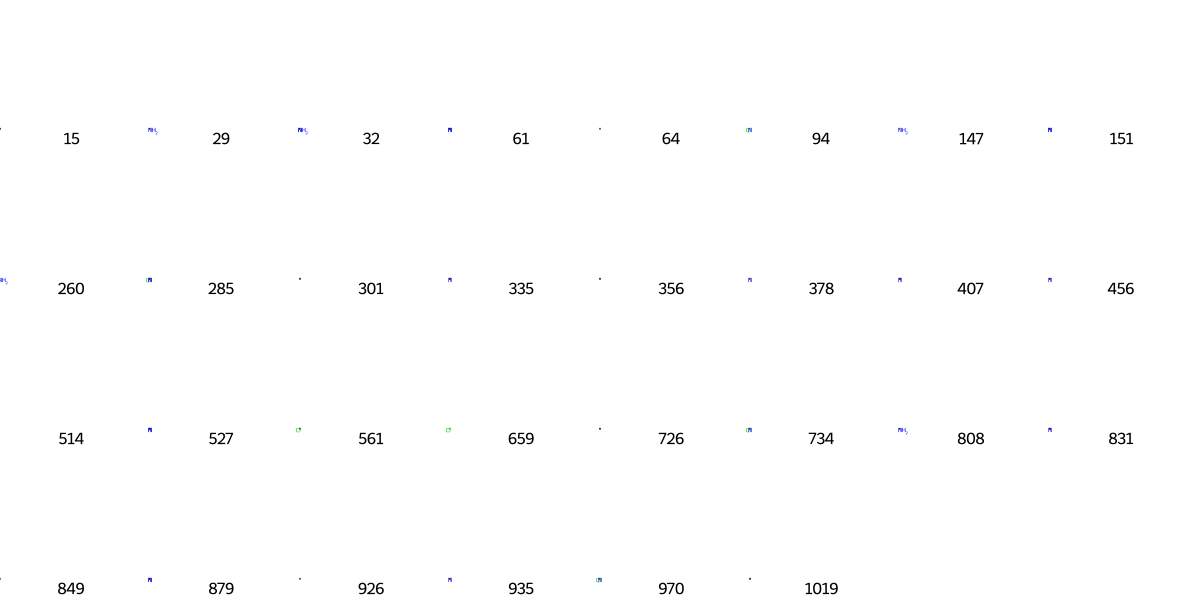

In [2613]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2614]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[2,
 4,
 64,
 90,
 119,
 128,
 167,
 175,
 193,
 229,
 269,
 276,
 300,
 301,
 322,
 323,
 356,
 361,
 378,
 389,
 428,
 432,
 489,
 562,
 565,
 593,
 610,
 611,
 618,
 621,
 693,
 695,
 704,
 721,
 726,
 786,
 831,
 849,
 890,
 906,
 926,
 1019]

In [2615]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[80,
 85,
 115,
 128,
 192,
 227,
 432,
 483,
 486,
 557,
 640,
 650,
 659,
 667,
 768,
 807,
 814]

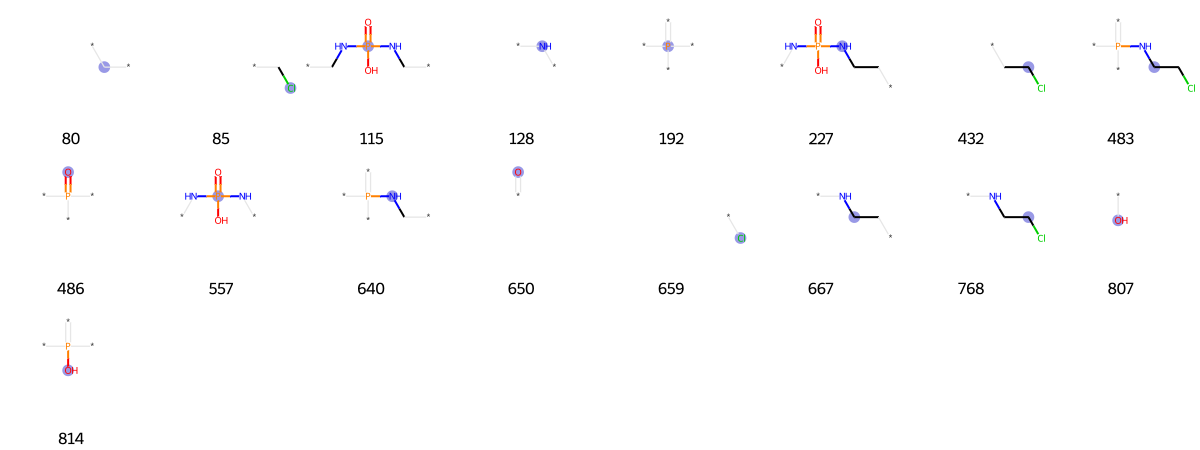

In [2616]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2617]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[31,
 64,
 84,
 97,
 110,
 128,
 131,
 175,
 200,
 201,
 272,
 316,
 342,
 356,
 366,
 378,
 412,
 428,
 448,
 471,
 499,
 552,
 561,
 659,
 672,
 674,
 726,
 745,
 755,
 792,
 807,
 842,
 849,
 855,
 929,
 934,
 974,
 1022]

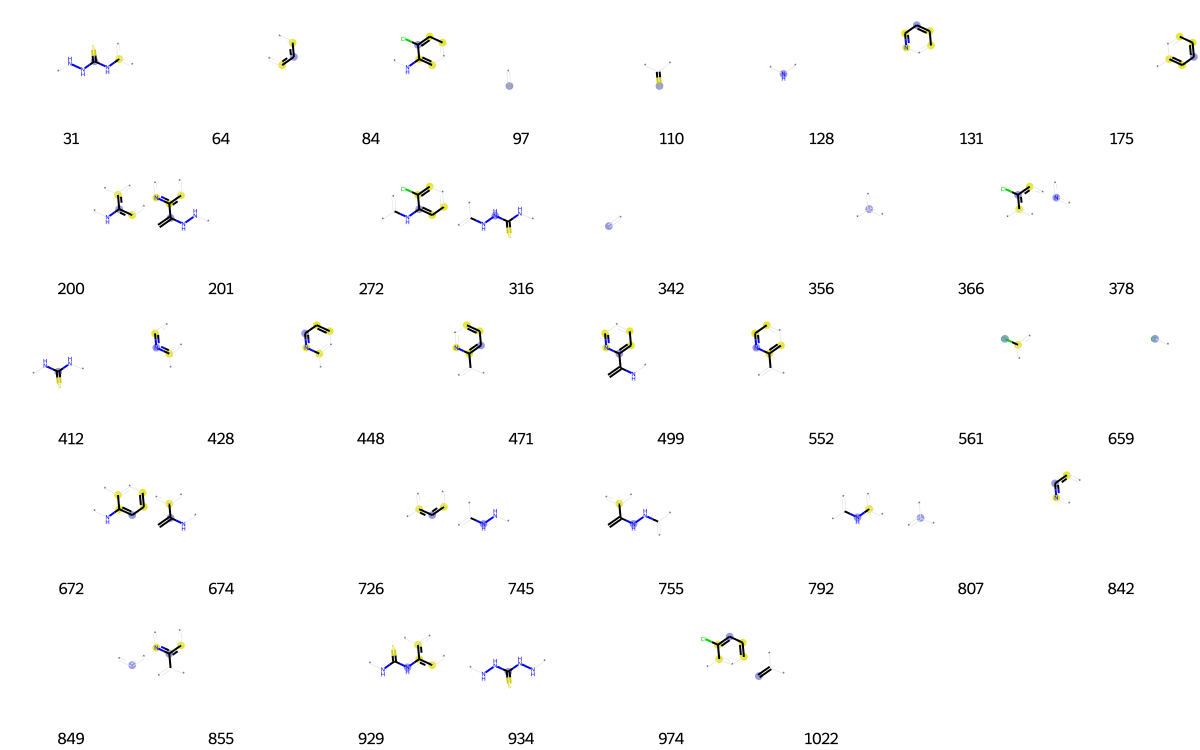

In [2618]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2619]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[2,
 4,
 13,
 23,
 36,
 64,
 79,
 80,
 121,
 138,
 147,
 175,
 292,
 356,
 381,
 389,
 407,
 417,
 436,
 444,
 456,
 458,
 514,
 523,
 533,
 556,
 614,
 650,
 656,
 695,
 726,
 767,
 772,
 807,
 825,
 833,
 849,
 893,
 926,
 935,
 950,
 956]

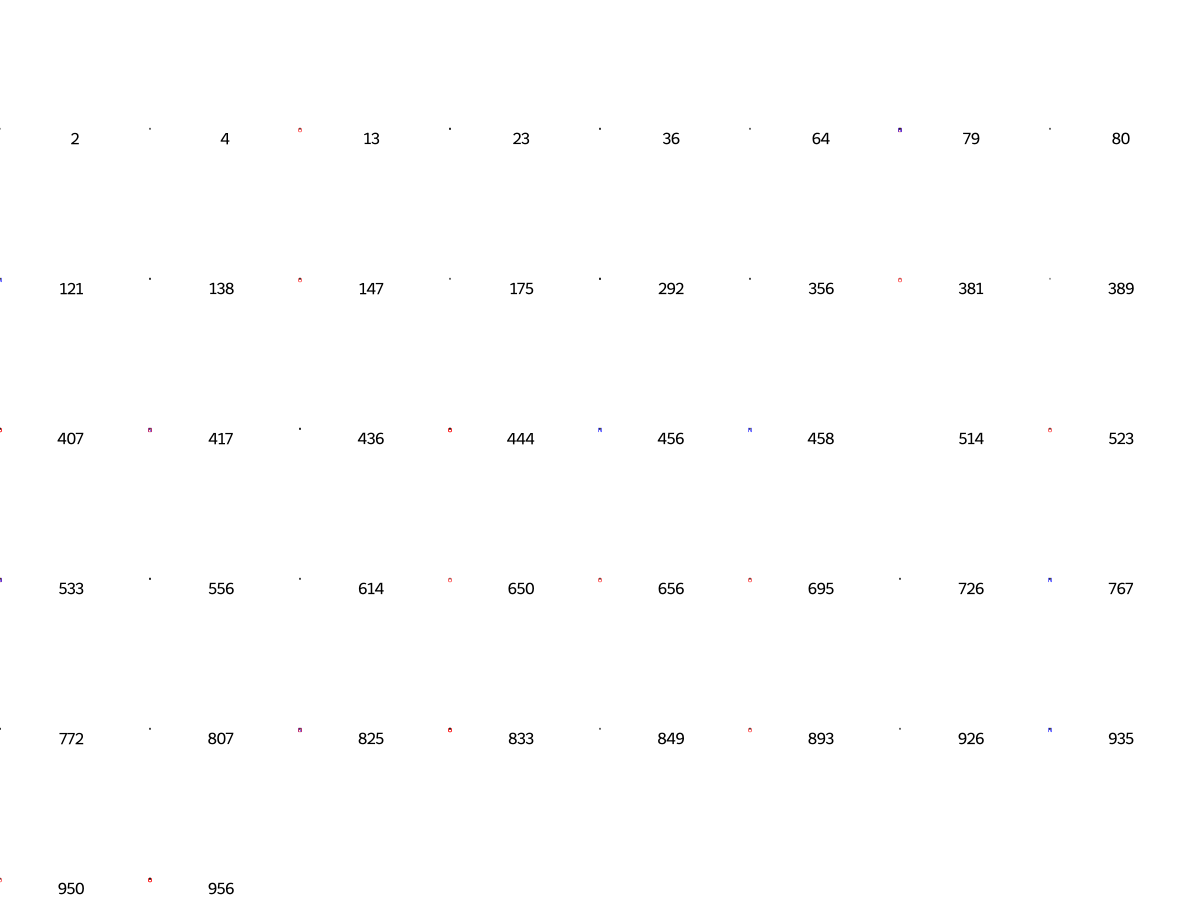

In [2620]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2621]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[9,
 33,
 59,
 64,
 67,
 175,
 205,
 322,
 356,
 361,
 389,
 406,
 512,
 578,
 583,
 650,
 695,
 718,
 726,
 745,
 751,
 781,
 807,
 841,
 849,
 875,
 893,
 948,
 961,
 967]

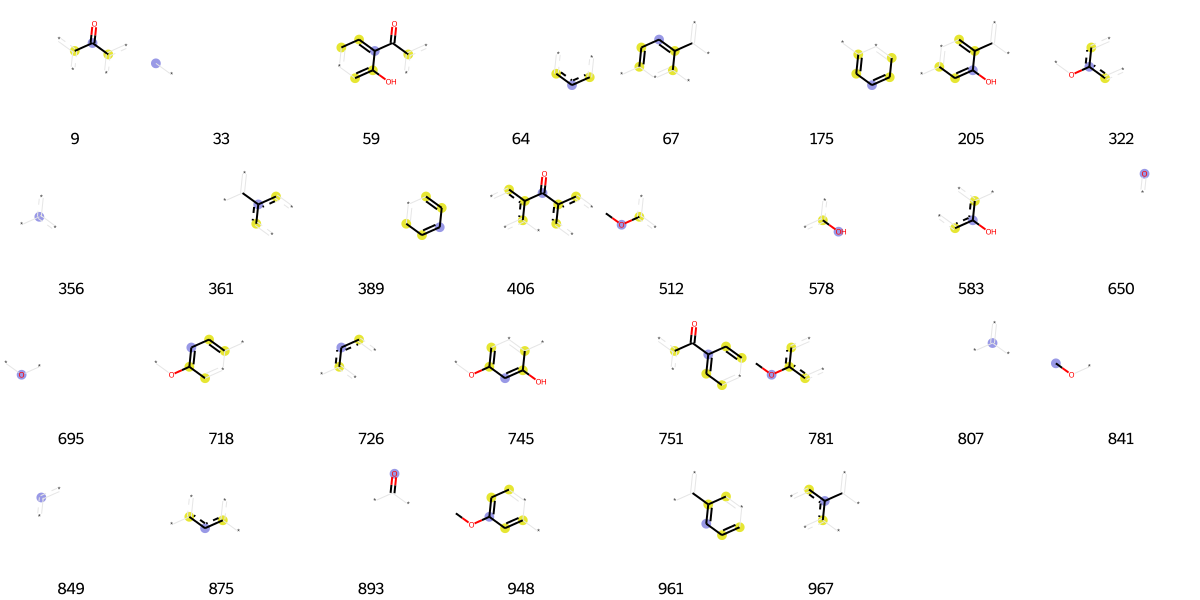

In [2622]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2623]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 38,
 45,
 62,
 73,
 79,
 80,
 90,
 101,
 111,
 118,
 189,
 192,
 227,
 238,
 249,
 260,
 274,
 314,
 323,
 356,
 367,
 369,
 370,
 378,
 486,
 553,
 563,
 572,
 650,
 692,
 695,
 698,
 699,
 706,
 715,
 721,
 749,
 750,
 757,
 783,
 790,
 802,
 807,
 814,
 829,
 831,
 849,
 875,
 888,
 891,
 898,
 908,
 935,
 966,
 1018]

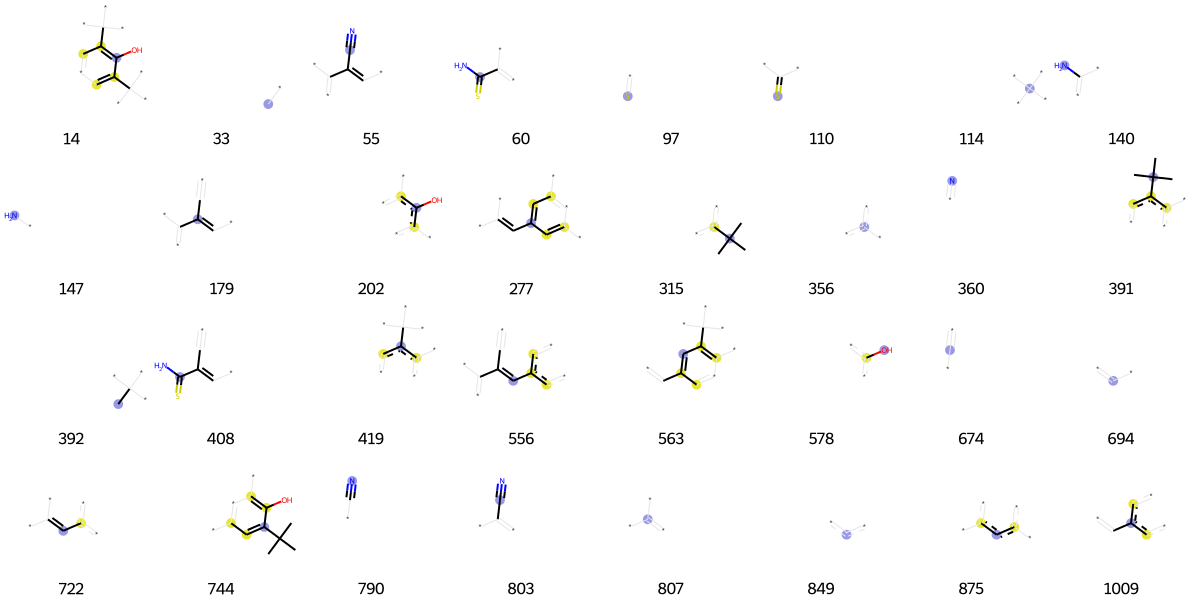

In [2624]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2625]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[36, 189, 650, 715, 725, 967, 979]

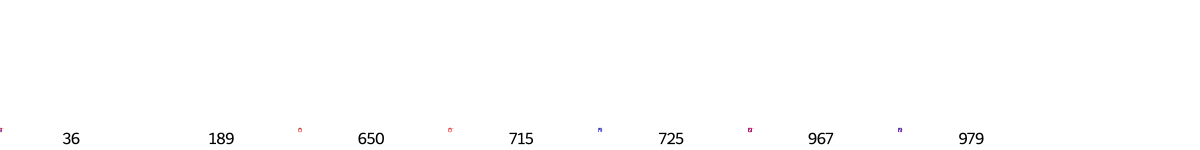

In [2626]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2627]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 14,
 30,
 33,
 46,
 64,
 80,
 107,
 108,
 117,
 121,
 128,
 175,
 178,
 202,
 216,
 283,
 310,
 341,
 356,
 389,
 428,
 486,
 543,
 554,
 557,
 561,
 603,
 650,
 659,
 671,
 675,
 695,
 726,
 730,
 745,
 778,
 781,
 807,
 816,
 849,
 881,
 893,
 905,
 946,
 1018]

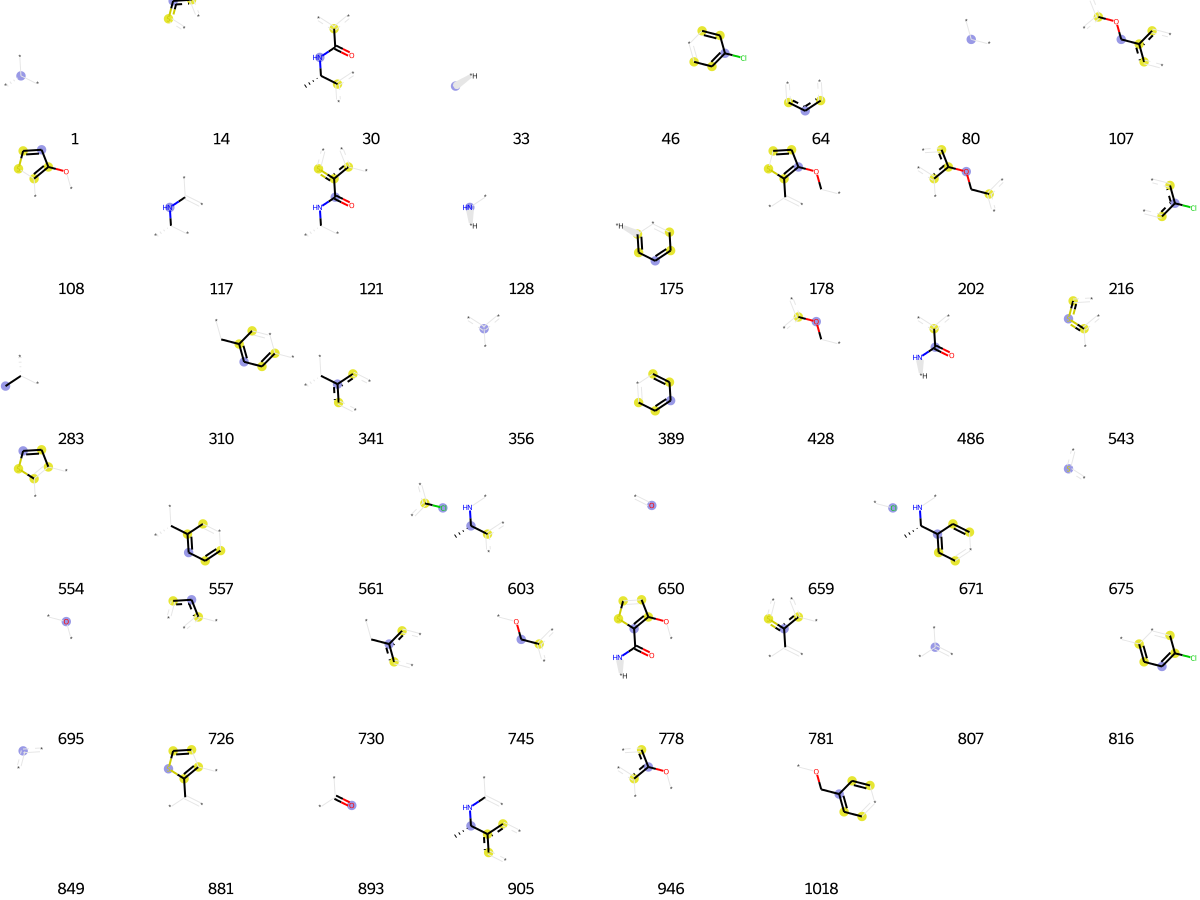

In [2628]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2629]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[144,
 147,
 188,
 319,
 350,
 356,
 433,
 452,
 547,
 650,
 715,
 726,
 780,
 849,
 888,
 974]

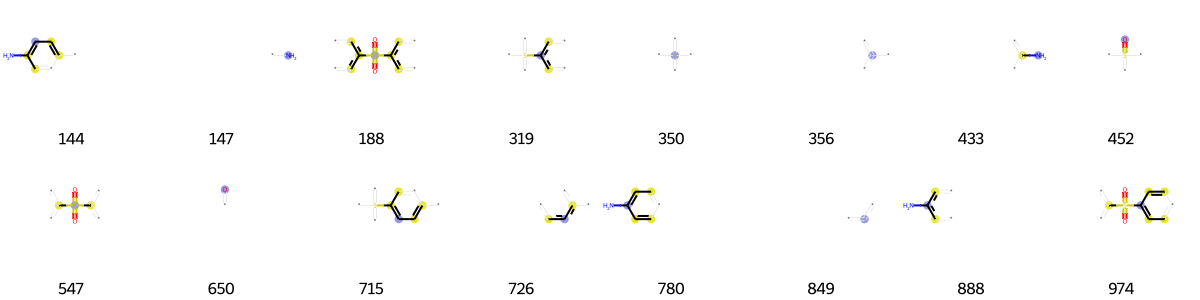

In [2630]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2631]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 62,
 133,
 166,
 203,
 209,
 239,
 314,
 320,
 333,
 356,
 512,
 518,
 575,
 580,
 583,
 614,
 650,
 656,
 683,
 695,
 726,
 736,
 762,
 787,
 803,
 830,
 831,
 841,
 849,
 875]

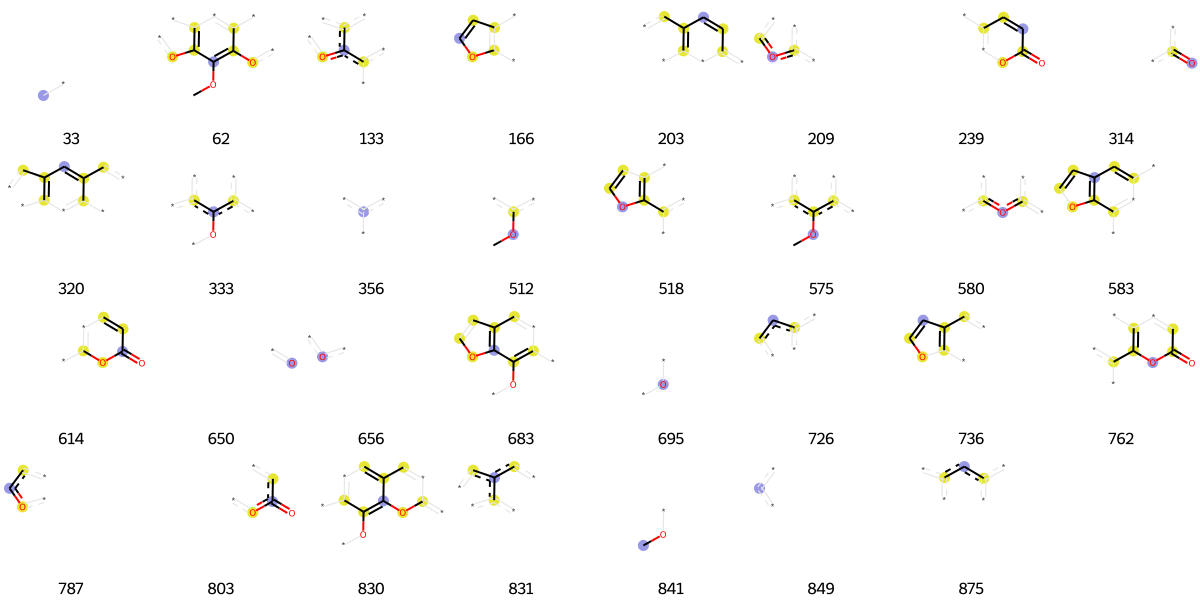

In [2632]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2633]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33,
 61,
 73,
 80,
 98,
 121,
 128,
 133,
 136,
 202,
 215,
 222,
 250,
 255,
 290,
 333,
 343,
 356,
 378,
 392,
 428,
 442,
 489,
 514,
 532,
 536,
 580,
 629,
 630,
 656,
 698,
 708,
 714,
 718,
 726,
 786,
 807,
 837,
 849,
 875,
 878,
 896,
 910,
 913,
 933,
 961]

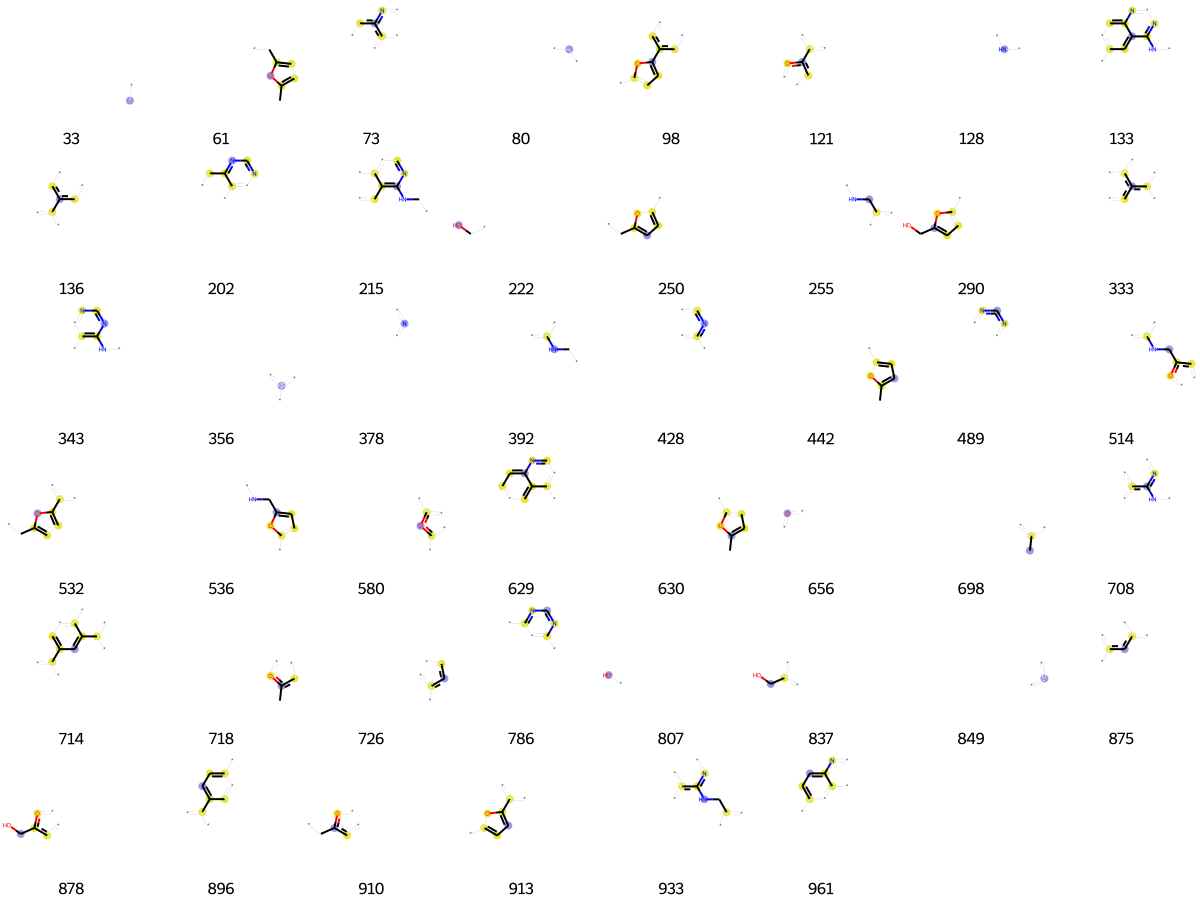

In [2634]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2635]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 11,
 31,
 33,
 36,
 55,
 80,
 111,
 138,
 147,
 173,
 250,
 259,
 264,
 295,
 325,
 356,
 432,
 444,
 474,
 479,
 500,
 526,
 552,
 602,
 618,
 642,
 650,
 694,
 695,
 698,
 714,
 718,
 803,
 807,
 824,
 835,
 846,
 893,
 926,
 931,
 932,
 933,
 953,
 1017]

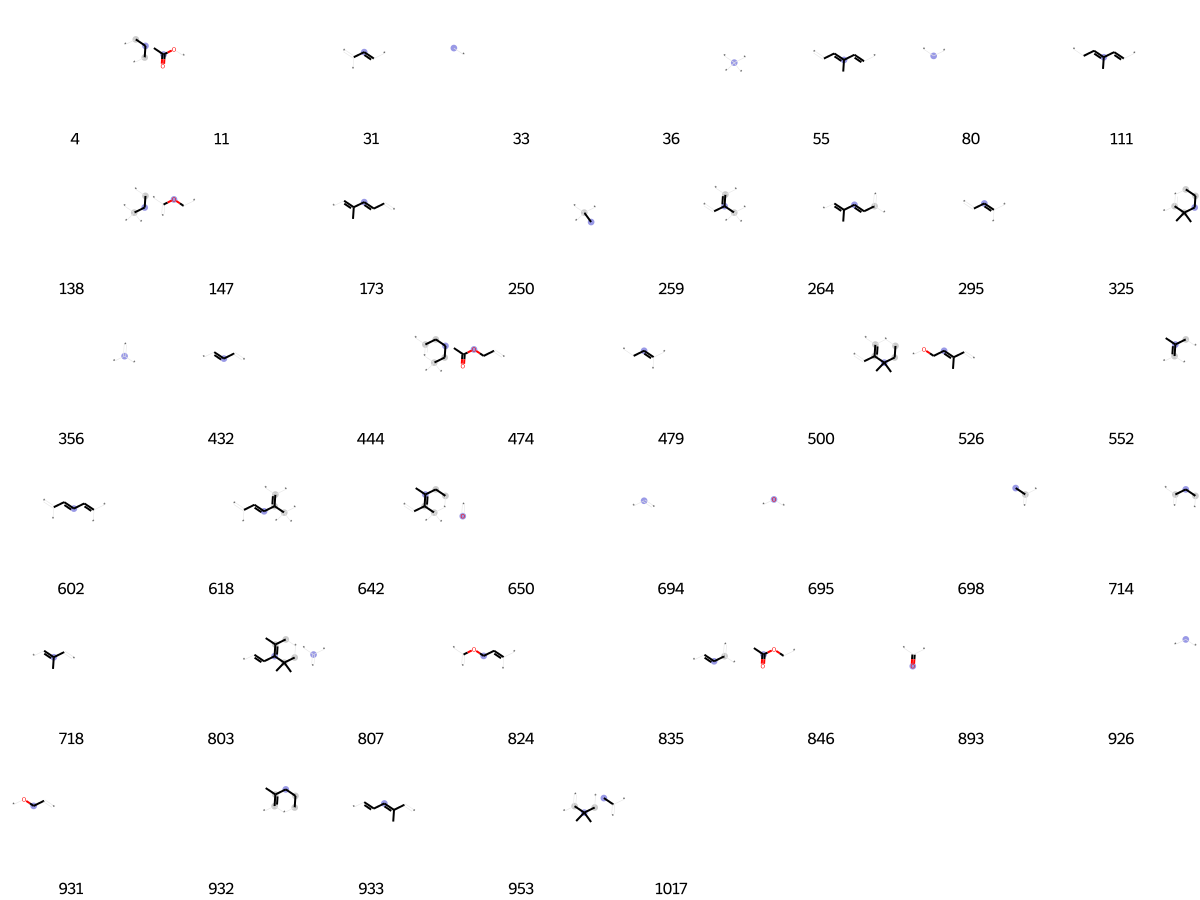

In [2636]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2637]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 2,
 4,
 15,
 33,
 64,
 80,
 90,
 118,
 119,
 128,
 169,
 227,
 283,
 328,
 329,
 333,
 356,
 386,
 416,
 428,
 430,
 482,
 522,
 550,
 606,
 658,
 695,
 711,
 726,
 759,
 782,
 806,
 807,
 849,
 882,
 946,
 1006,
 1014]

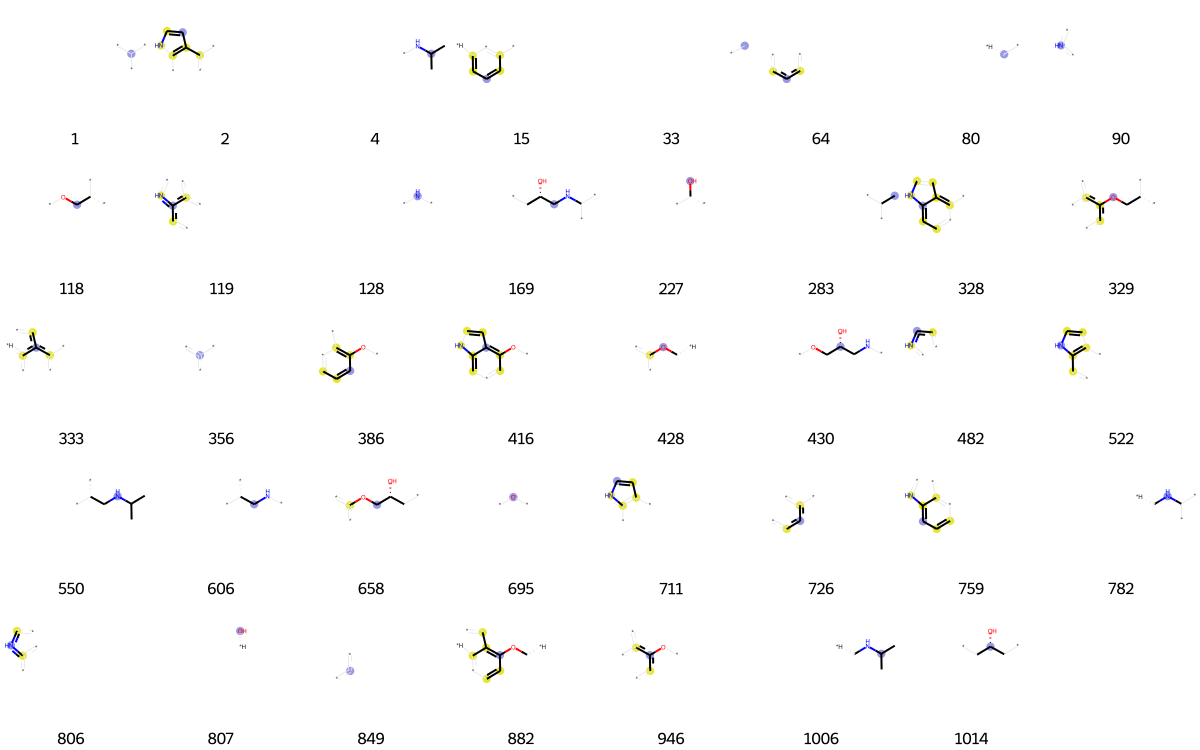

In [2638]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2639]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[167, 356, 578, 745, 807, 849, 875, 959]

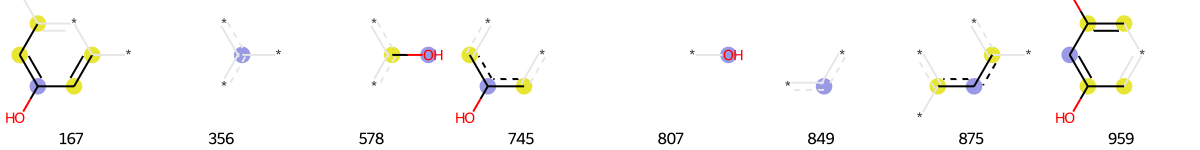

In [2640]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2641]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 42,
 64,
 79,
 80,
 147,
 175,
 197,
 356,
 389,
 403,
 650,
 726,
 730,
 786,
 807,
 820,
 825,
 849,
 857,
 893,
 1017]

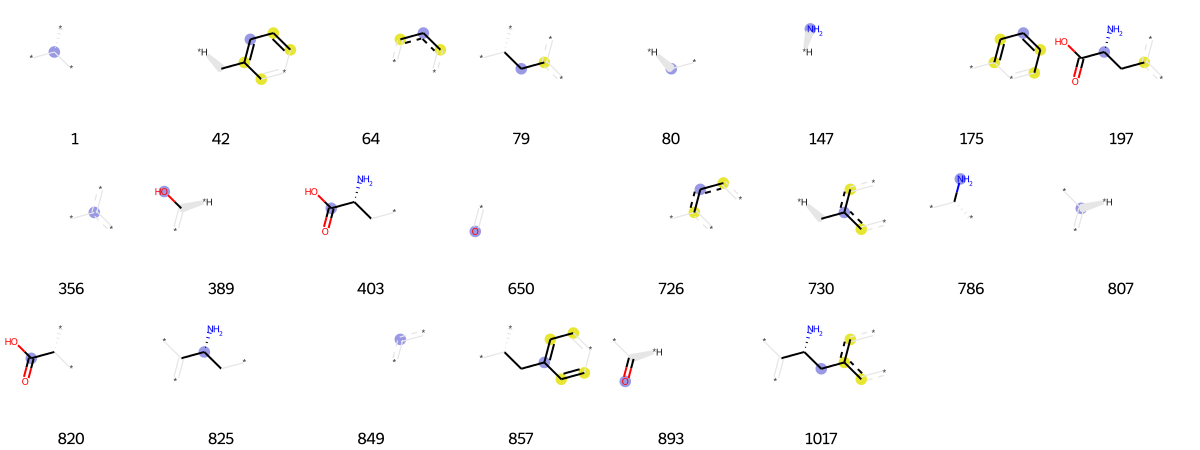

In [2642]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2643]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 34,
 75,
 102,
 112,
 128,
 191,
 204,
 247,
 305,
 324,
 356,
 360,
 367,
 378,
 380,
 381,
 428,
 458,
 491,
 500,
 529,
 558,
 562,
 610,
 674,
 698,
 717,
 726,
 787,
 790,
 795,
 799,
 831,
 842,
 843,
 849,
 875,
 929,
 930]

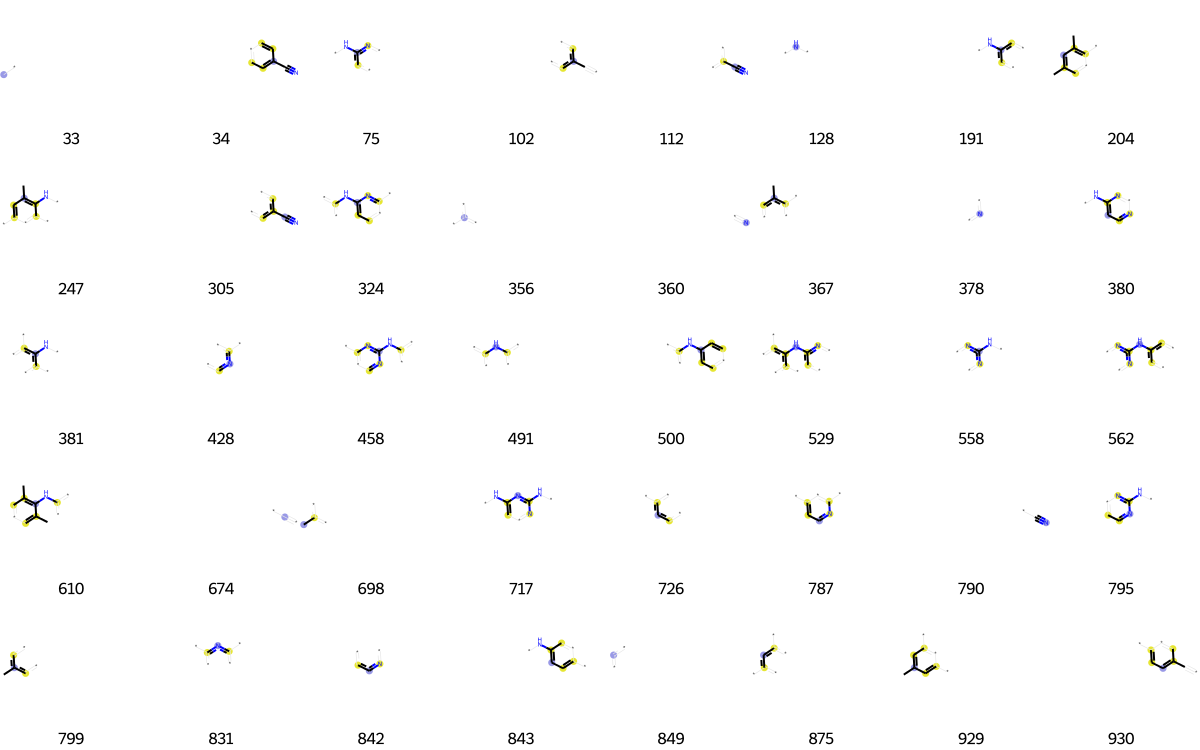

In [2644]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2645]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 34,
 57,
 74,
 80,
 92,
 94,
 106,
 184,
 204,
 214,
 219,
 235,
 237,
 268,
 294,
 318,
 319,
 342,
 350,
 352,
 356,
 357,
 361,
 366,
 378,
 412,
 416,
 425,
 428,
 452,
 456,
 507,
 514,
 518,
 578,
 585,
 594,
 639,
 650,
 674,
 695,
 698,
 702,
 705,
 715,
 726,
 756,
 757,
 767,
 786,
 794,
 800,
 807,
 831,
 849,
 865,
 875,
 926,
 932,
 935,
 946,
 977]